In [328]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [329]:
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")
train_data.head()

Product_id  Stall_no             instock_date  Market_Category  \
0  BRAE2NF6JA5GUEXG      37.0  2015-08-22 18:36:12.000                2   
1  TUNE8SFB6RJN2HSD      38.0  2016-03-27 21:19:13.000               24   
2  BRAEAR7WZPQGPBZU       9.0  2015-08-18 19:25:22.000              447   
3  WATDZ2ZQ8JPDHCTJ      50.0  2016-03-28 21:53:01.000               23   
4  JWSEBUKYQPMBZ3RK       7.0  2016-03-29 22:58:53.000               63   

  Customer_name Loyalty_customer Product_Category  Grade  Demand  \
0      Lillyann              Yes          Fashion      1      68   
1         Klynn              Yes          Fashion      0      51   
2         Ridge              Yes       Child_care      0      10   
3         Abran              Yes      Educational      2      48   
4        Dustyn              Yes           Repair      1      35   

   Discount_avail  charges_1  charges_2 (%)  Minimum_price  Maximum_price  \
0             0.0      376.0           11.0         2983.0         4713.0   
1             0.0      397.0           12.0         7495.0        10352.0   
2             0.0      250.0            9.0         5752.0         7309.0   
3             0.0      144.0           13.0         5090.0        20814.0   
4             1.0      211.0            4.0         2430.0         9261.0   

   Selling_Price  
0    4185.947700  
1    9271.490256  
2    6785.701362  
3   13028.917824  
4     906.553935

In [330]:
train_data.shape

(6368, 15)

In [331]:
test_data.head()

Product_id  Stall_no             instock_date  Market_Category  \
0  SCHE4YSTDVPVZVXW      39.0  2016-01-13 07:45:08.000              205   
1  ACCEGCATKHNRXUHW      49.0  2015-08-23 20:37:05.000                3   
2  NKCE6GJ5XVJDXNNZ       1.0  2015-11-14 18:12:39.000              183   
3  NKCEB8BK3ZXDHDHM       8.0  2015-11-21 04:56:19.000              358   
4  TOPEFDXSAHRNPF94      33.0  2015-05-06 15:09:46.000              167   

  Customer_name Loyalty_customer Product_Category  Grade  Demand  \
0        Ivanka              No           Fashion      0      90   
1         Isaak              Yes          Fashion      0      87   
2      Analiese              No        Technology      2      55   
3         Rusty              Yes       Child_care      3      86   
4        Eloise              No        Technology      0      27   

   Discount_avail  charges_1  charges_2 (%)  Minimum_price  Maximum_price  
0               0      380.0           16.0         2576.0           3340  
1               0      393.0           16.0         1202.0           1955  
2               0      493.0            9.0         7175.0          15715  
3               0      303.0           16.0         5404.0          13078  
4               0      567.0           16.0         4069.0           6244

In [332]:
test_data.shape

(3430, 14)

In [ ]:
train_data.info()

Clearly we have missing values

In [334]:
train_data.describe()

Stall_no  Market_Category        Grade       Demand  Discount_avail  \
count  6363.000000      6368.000000  6368.000000  6368.000000     6330.000000   
mean     25.309445       199.340609     0.643687    50.921168        0.140442   
std      14.328980       170.275570     1.025092    29.091922        0.347473   
min       1.000000         0.000000     0.000000     1.000000        0.000000   
25%      13.000000        55.000000     0.000000    26.000000        0.000000   
50%      25.000000       132.000000     0.000000    51.000000        0.000000   
75%      37.000000       403.000000     2.000000    76.000000        0.000000   
max      50.000000       471.000000     3.000000   100.000000        1.000000   

         charges_1  charges_2 (%)  Minimum_price  Maximum_price  Selling_Price  
count  6170.000000    6163.000000    6330.000000    6025.000000    6327.000000  
mean    264.514100      10.146195    3531.349763    6432.545892    4563.242592  
std     124.483056       4.318339    2194.729604    3716.177364    2979.102408  
min     100.000000       1.000000       1.000000     404.000000   -6062.470000  
25%     163.000000       7.000000    1879.250000    3918.000000    2450.005280  
50%     252.000000      10.000000    3157.500000    5634.000000    4210.384640  
75%     314.000000      14.000000    4697.000000    8126.000000    6167.643252  
max     649.000000      17.000000   17580.000000   58812.000000   22638.325941

- Here we can see minimum selling price is negative which is not a real time value 

In [335]:
# Checking negative values in Selling_price
len(train_data[train_data['Selling_Price'] <= 0])

14

In [336]:
# So first we remove these observations
train_data = train_data[train_data['Selling_Price'] > 0]

In [337]:
len(train_data[train_data['Selling_Price'] <= 0])

0

In [338]:
# Now check missing values
train_data.isna().sum()

Product_id            0
Stall_no              5
instock_date          0
Market_Category       0
Customer_name       206
Loyalty_customer      0
Product_Category      0
Grade                 0
Demand                0
Discount_avail       37
charges_1           197
charges_2 (%)       204
Minimum_price        38
Maximum_price       340
Selling_Price         0
dtype: int64

In [339]:
train_data.shape

(6313, 15)

In [340]:
for var in train_data:
    print(f"Unique Values in {var} is {len(train_data[var].unique())}")

Unique Values in Product_id is 6313
Unique Values in Stall_no is 51
Unique Values in instock_date is 5309
Unique Values in Market_Category is 248
Unique Values in Customer_name is 5856
Unique Values in Loyalty_customer is 2
Unique Values in Product_Category is 10
Unique Values in Grade is 4
Unique Values in Demand is 100
Unique Values in Discount_avail is 3
Unique Values in charges_1 is 487
Unique Values in charges_2 (%) is 18
Unique Values in Minimum_price is 4211
Unique Values in Maximum_price is 4588
Unique Values in Selling_Price is 6307


- Some customer has purchased more than 1 products.
- At same time more than one products have got purchased.

# Data Preprocessing

In [341]:
from sklearn.model_selection import train_test_split
data = train_data[train_data['Stall_no'].notna()]
print(data.shape)


(6308, 15)


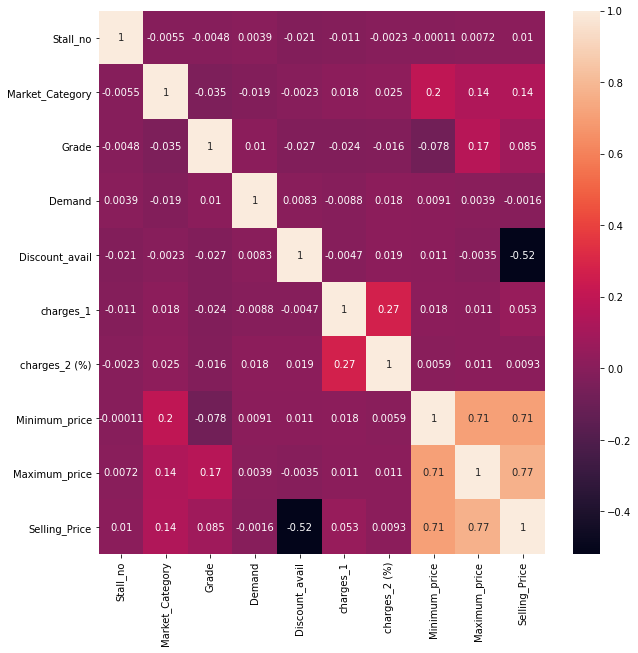

In [342]:
cor = train_data.corr()
fig = plt.figure(figsize = (10,10))
sns.heatmap(cor,annot= True)

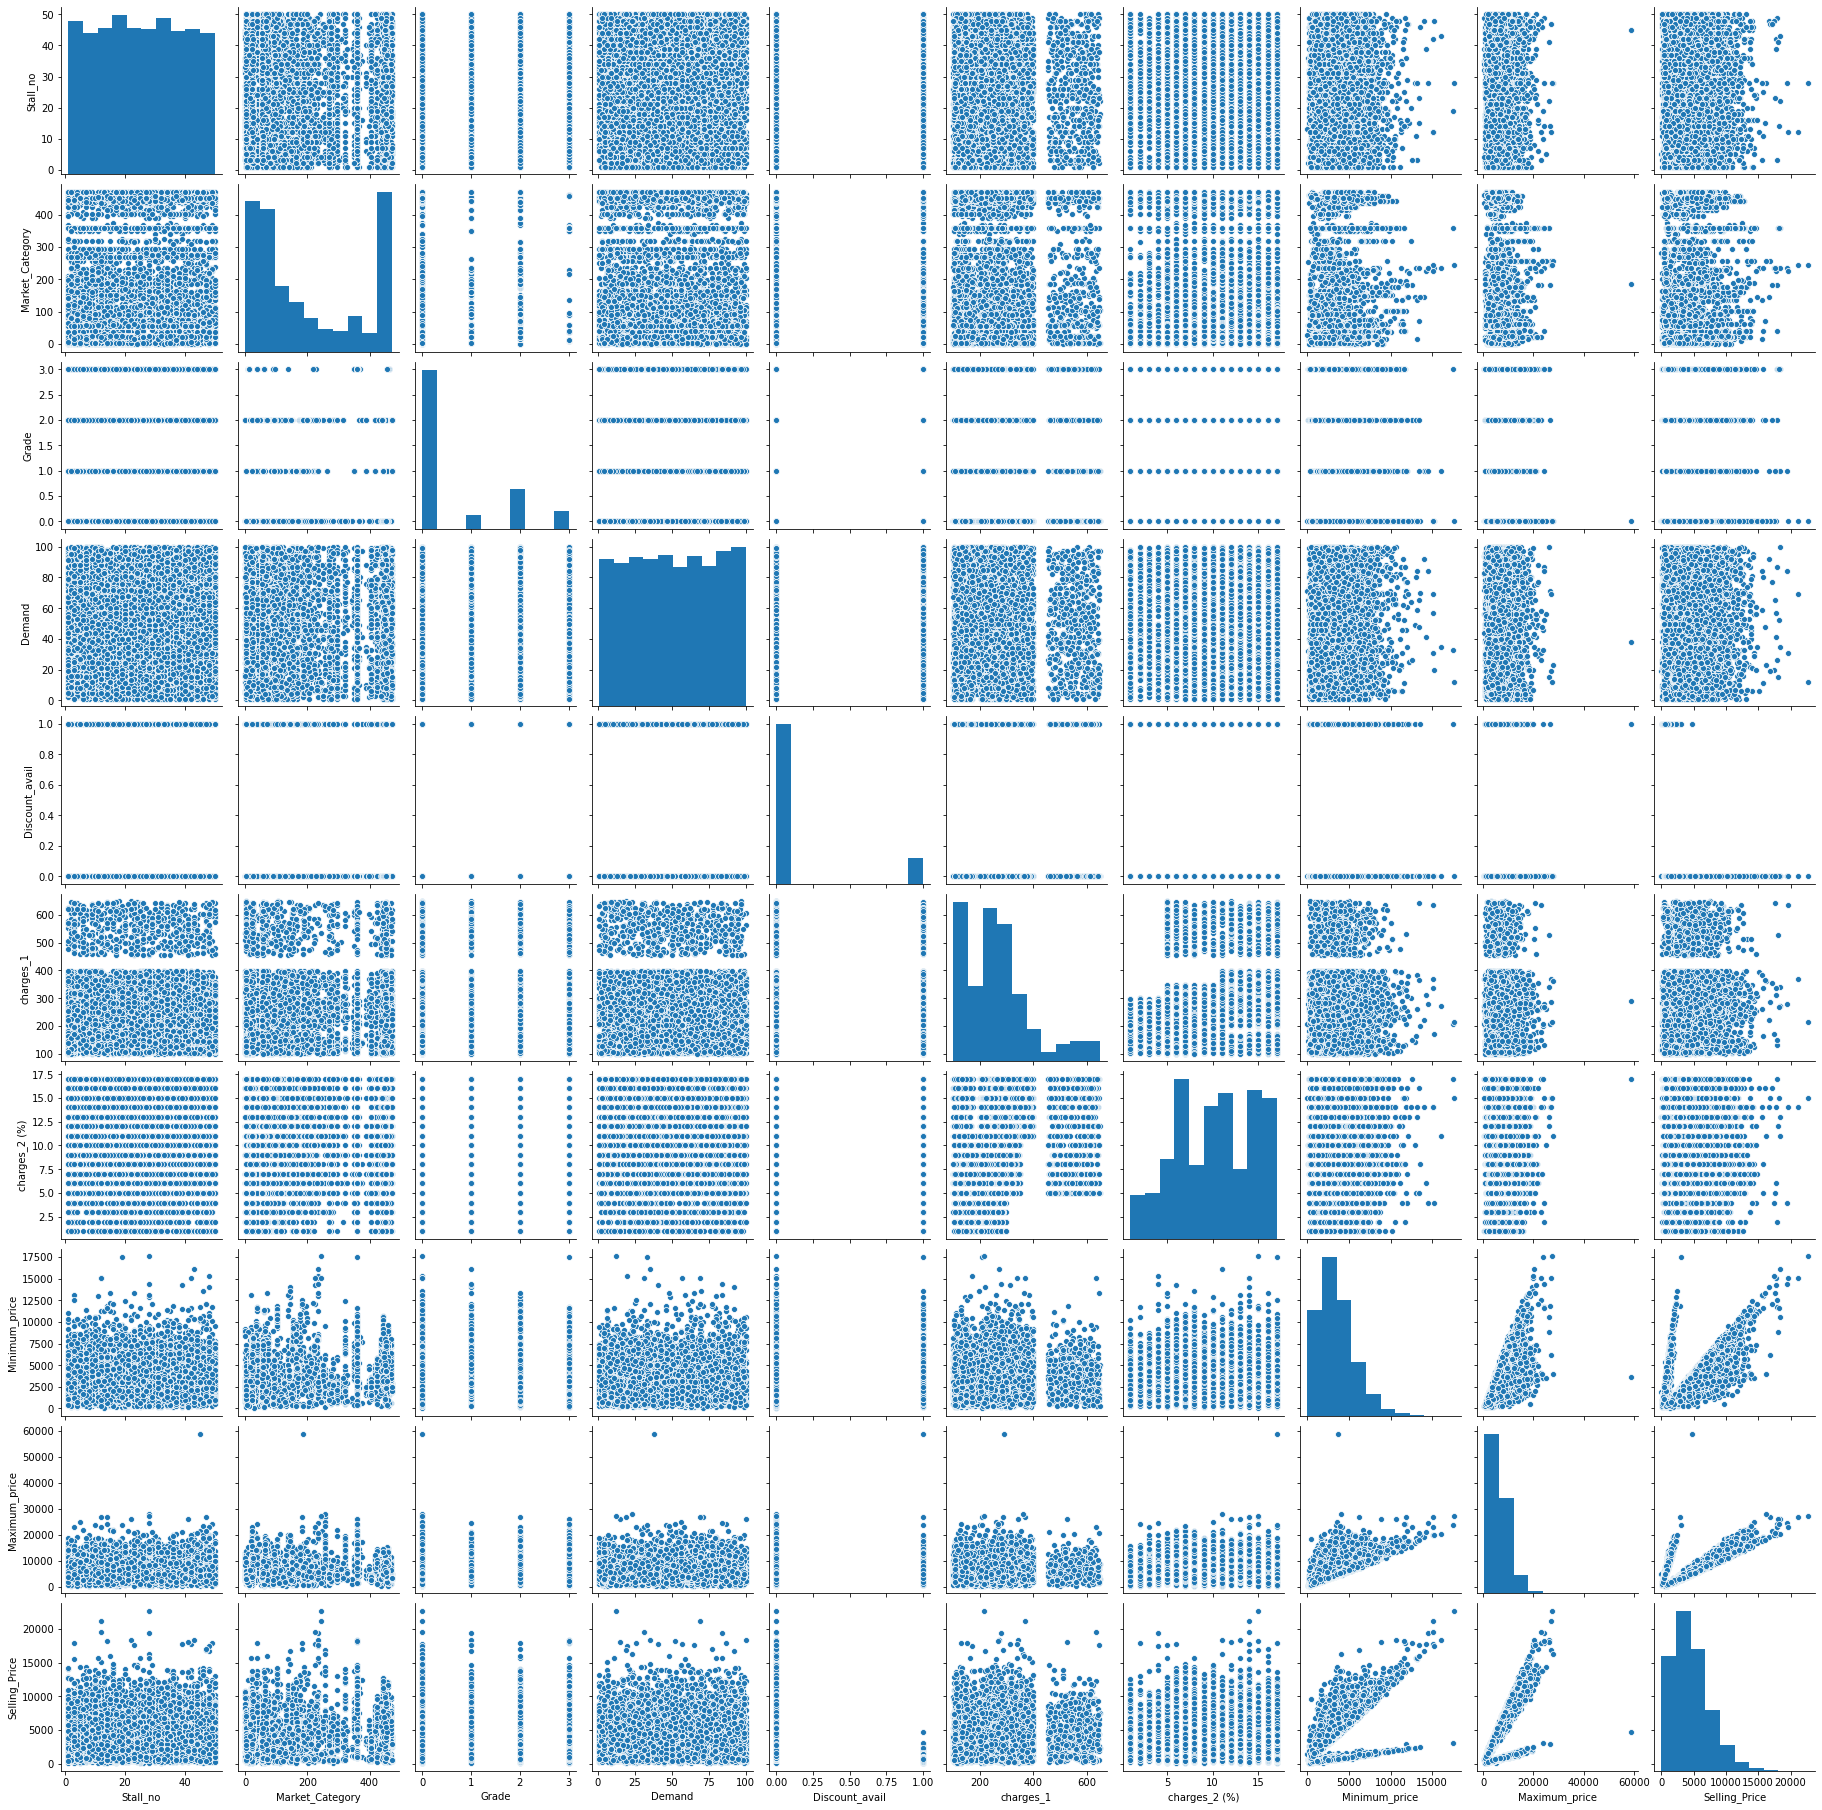

In [343]:
sns.pairplot(train_data)

From this pairplot we can see lot of things ---
- chages_1, charges_2, maximum, minimum, selling price all are positively skewed.
- Though we can see market category is positively skewed but is it one categorical variable so we can not use any transformation there. 
- Most of the variables are uniformly associated with each other.
- Clearly we can see many potential outliers for different variables (mainly maximum price).
- One strange observation is we can see a clear cluster for charges_1, maximum and minimum price when comparing with selling price. May be we can try clusters.

In [526]:
X = data.iloc[:,:-1]
y = data['Selling_Price']

In [527]:
# Now check missing values
X.isna().sum()

Product_id            0
Stall_no              0
instock_date          0
Market_Category       0
Customer_name       206
Loyalty_customer      0
Product_Category      0
Grade                 0
Demand                0
Discount_avail       37
charges_1           197
charges_2 (%)       204
Minimum_price        38
Maximum_price       339
dtype: int64

In [528]:
# from scipy.stats import spearmanr
# # now we craete one matrix of spearman's correlations
# train_data_dummy = train_data.copy()
# train_data_dummy['Loyalty_customer'] = train_data['Loyalty_customer'].map({'Yes' : 1, "No" : 0})
# vars = ['Stall_no','Market_Category','Loyalty_customer','Grade','Discount_avail','charges_2 (%)']

# rows = []
# for var1 in vars:
#     cols = []
#     for var2 in vars:
#         spe_rho,p_value = spearmanr(train_data_dummy[var1],train_data_dummy[var2])
#         cols.append(spe_rho)
#     rows.append(cols)
    
# spearman_association_table = pd.DataFrame(np.array(rows), columns= vars, index= vars)
# spearman_association_table

In [529]:
# from scipy.stats import kendalltau
# # now we craete one matrix of spearman's correlations
# train_data_dummy = train_data.copy()
# train_data_dummy['Loyalty_customer'] = train_data['Loyalty_customer'].map({'Yes' : 1, "No" : 0})
# vars = ['Stall_no','Market_Category','Loyalty_customer','Grade','Discount_avail','charges_2 (%)']
# print(train_data_dummy.head())
# rows = []
# for var1 in vars:
#     cols = []
#     for var2 in vars:
#         ken_tau,p_value = kendalltau(train_data_dummy[var1],train_data_dummy[var2])
#         cols.append(ken_tau)
#     rows.append(cols)
    
# kendle_association_table = pd.DataFrame(np.array(rows), columns= vars, index= vars)
# kendle_association_table

In [530]:
import warnings
warnings.filterwarnings("ignore")

#### Missing Value Treatment

#### Discount_avail

In [531]:
X['Discount_avail'] = X['Discount_avail'].fillna(X['Discount_avail'].mode()[0])  # as discount_avialable = no is very frequent
# X_test['Discount_avail'] = X_test['Discount_avail'].fillna(X_test['Discount_avail'].mode()[0])
# X_train['Discount_avail'] = X_train['Discount_avail'].fillna('missing')
# X_test['Discount_avail'] = X_test['Discount_avail'].fillna('missing')

In [532]:
X['Discount_avail'].isna().sum()

0

#### charges_2 (%)

In [533]:
X.groupby(["Discount_avail"]).median()["charges_2 (%)"]

Discount_avail
0.0    10.0
1.0    10.0
Name: charges_2 (%), dtype: float64

In [534]:
X.groupby(["Grade"]).median()["charges_2 (%)"]

Grade
0    10.0
1    10.0
2    10.0
3     9.0
Name: charges_2 (%), dtype: float64

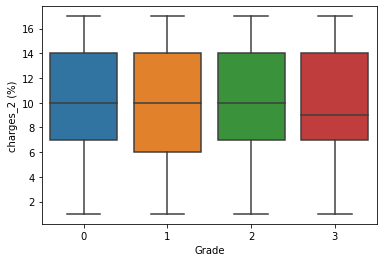

In [535]:
sns.boxplot(y = 'charges_2 (%)', x = 'Grade', data = X)

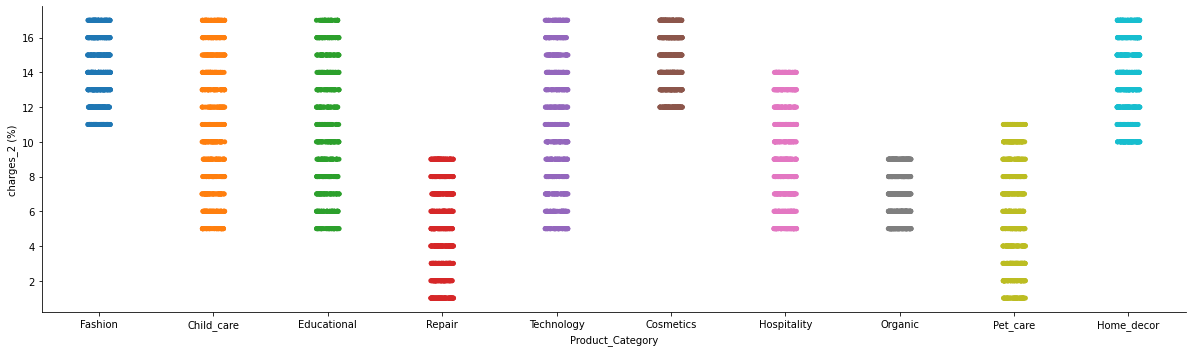

In [536]:
sns.catplot(y = 'charges_2 (%)', x = 'Product_Category', data = X,aspect= 20/6)

- We can clearly see distribution for charges_2 is different for different products unlike for grade.

In [537]:
## Charges mainly differs based on product category
charges_2_dict = X.groupby(["Product_Category"]).median()["charges_2 (%)"].to_dict()  # We have taken product category as we can see charges_2 is different for different products
charges_2_dict

{'Child_care': 11.0,
 'Cosmetics': 15.0,
 'Educational': 11.0,
 'Fashion': 14.0,
 'Home_decor': 14.0,
 'Hospitality': 9.0,
 'Organic': 7.0,
 'Pet_care': 6.0,
 'Repair': 5.0,
 'Technology': 11.0}

In [538]:
X['charges_2_missing'] = np.where(X['charges_2 (%)'].isna(),1,0)

In [539]:
# for row in list(X_train[X_train['charges_2 (%)'].isna()].index):
#     for row_dict in range(len(list(charges_2_dict.keys()))):
# #         print(row_dict)
#         if (X_train.loc[row,'Discount_avail'] == list(charges_2_dict.keys())[row_dict][0]) and (X_train.loc[row,'Grade'] == list(charges_2_dict.keys())[row_dict][1]):
#             X_train.loc[row,'charges_2 (%)'] = list(charges_2_dict.values())[row_dict]


for row in list(X[X['charges_2 (%)'].isna()].index):
    for key in list(charges_2_dict.keys()):
#         print(row_dict)
        if  X.loc[row,'Product_Category'] == key:
            X.loc[row,'charges_2 (%)'] = charges_2_dict[key]
        

In [540]:
X['charges_2 (%)'].isna().sum()

0

#### Minimum_price , Maximum_price

From pairplot we can not see any kind of variable with no na values which has a good realation with maximum and minimum price. So we check further with all categorical variables and bivariate relation with these variables

In [541]:
X.groupby('Discount_avail').median()[['Minimum_price','Maximum_price']]

Minimum_price  Maximum_price
Discount_avail                              
0.0                    3161.0         5621.0
1.0                    3195.5         5802.5

                                Minimum_price         Maximum_price        
                                        count  median         count  median
Discount_avail Loyalty_customer                                            
0.0            No                        2076  2976.5          1993  5244.0
               Yes                       3318  3311.0          3130  5903.5
1.0            No                         365  3018.0           352  5244.5
               Yes                        511  3496.0           494  6135.0


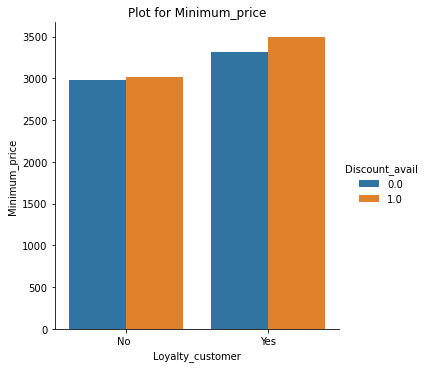

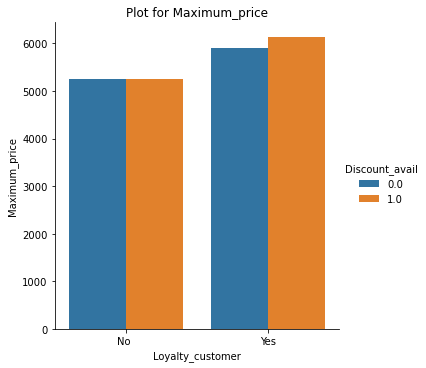

In [542]:
print(X.groupby(['Discount_avail','Loyalty_customer']).agg(['count','median'])[['Minimum_price','Maximum_price']])

df = X.groupby(['Discount_avail','Loyalty_customer']).median()[['Minimum_price','Maximum_price']].reset_index()

for var in ['Minimum_price','Maximum_price']:
    sns.factorplot(x = 'Loyalty_customer' , y = var, data = df, hue = 'Discount_avail',kind = 'bar')
    plt.title(f'Plot for {var}')
    plt.show()

                     Minimum_price         Maximum_price         
                             count  median         count   median
Discount_avail Grade                                             
0.0            0              3689  3297.0          3491   5465.0
               1               334  3948.5           313   7339.0
               2               917  2383.0           882   5288.5
               3               454  3167.0           437   9734.0
1.0            0               625  3482.0           601   5775.0
               1                42  4837.0            43   8195.0
               2               164  2337.0           159   5044.0
               3                45  3195.0            43  10956.0


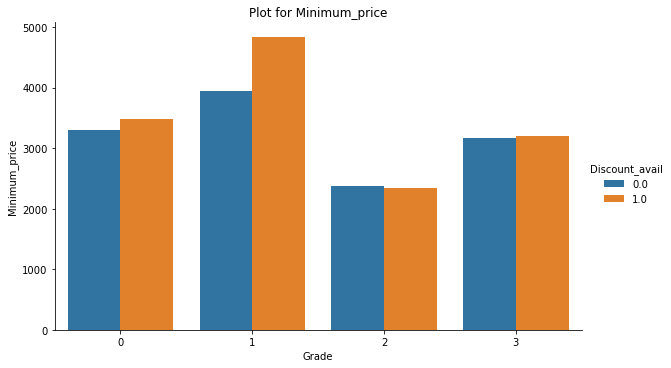

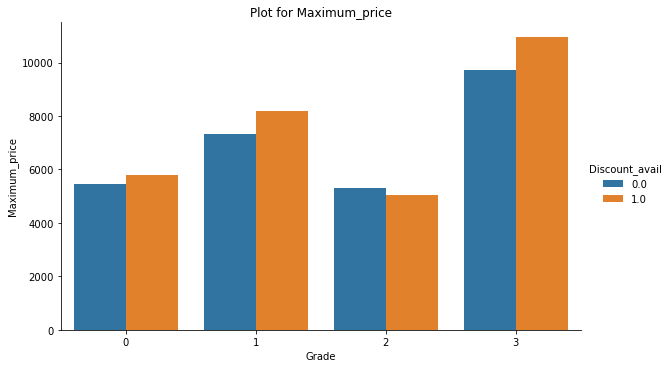

In [543]:
print(X.groupby(['Discount_avail','Grade']).agg(['count','median'])[['Minimum_price','Maximum_price']])
df = X.groupby(['Discount_avail','Grade']).median()[['Minimum_price','Maximum_price']].reset_index()

for var in ['Minimum_price','Maximum_price']:
    sns.factorplot(x = 'Grade' , y = var, data = df, hue = 'Discount_avail',kind = 'bar',aspect=10/6)
    plt.title(f'Plot for {var}')
    plt.show()

                       Minimum_price         Maximum_price         
                               count  median         count   median
Grade Product_Category                                             
0     Child_care                 458  3311.0           429   5630.0
      Cosmetics                  449  3332.0           427   5668.0
      Educational                407  3220.0           387   5293.0
      Fashion                    430  3311.0           404   5741.0
      Home_decor                 422  3536.5           408   5496.0
      Hospitality                406  3218.5           385   5383.0
      Organic                    416  3206.5           402   5276.0
      Pet_care                   440  3185.5           420   5497.5
      Repair                     461  3299.0           437   5703.0
      Technology                 425  3485.0           393   5417.0
1     Child_care                  43  4006.0            40   6725.5
      Cosmetics                   35  3235.0    

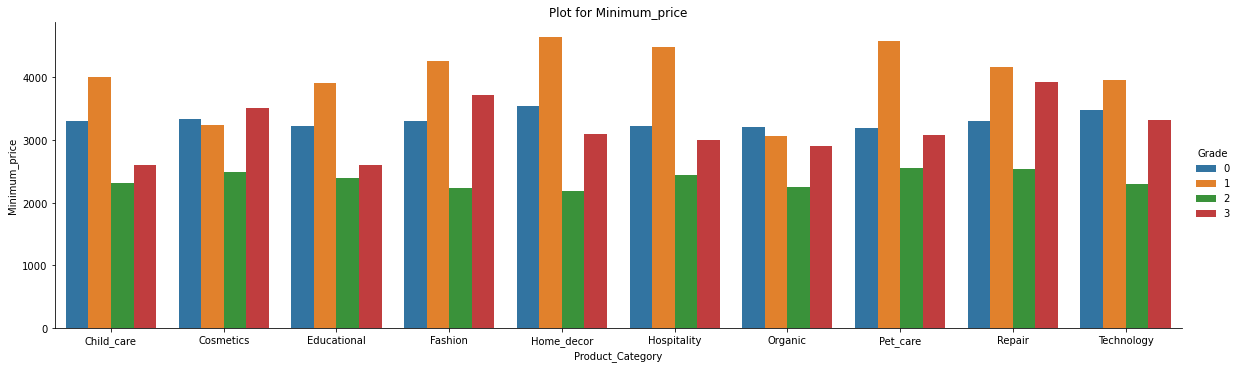

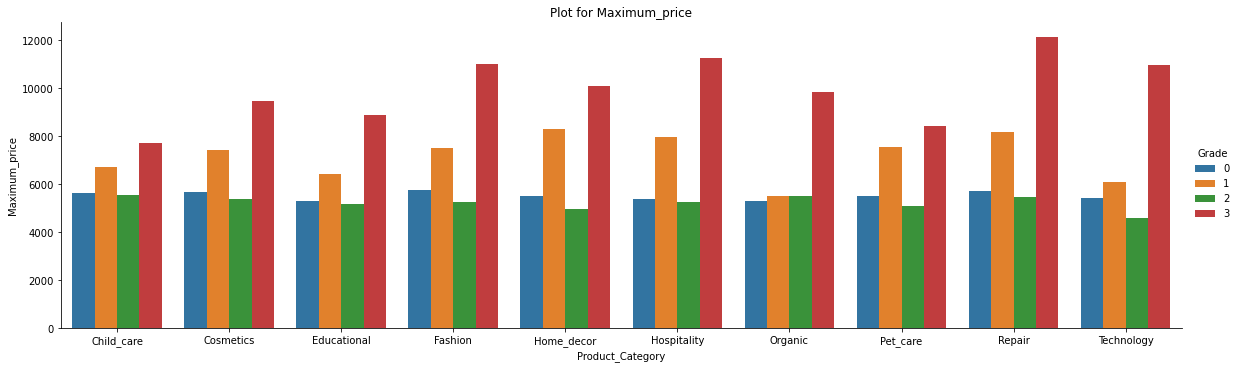

In [545]:
print(X.groupby(['Grade','Product_Category']).agg(['count','median'])[['Minimum_price','Maximum_price']])

df = X.groupby(['Grade','Product_Category']).median()[['Minimum_price','Maximum_price']].reset_index()

for var in ['Minimum_price','Maximum_price']:
    sns.factorplot(x = 'Product_Category' , y = var, data = df, hue = 'Grade',kind = 'bar',aspect=20/6)
    plt.title(f'Plot for {var}')
    plt.show()

                                Minimum_price         Maximum_price        
                                        count  median         count  median
Discount_avail Product_Category                                            
0.0            Child_care                 551  3183.0           514  5736.5
               Cosmetics                  533  3221.0           506  5782.0
               Educational                517  3080.0           491  5390.0
               Fashion                    527  3238.0           498  5745.0
               Home_decor                 515  3242.0           495  5590.0
               Hospitality                533  3012.0           503  5490.0
               Organic                    520  2997.5           508  5495.0
               Pet_care                   593  3169.0           570  5771.0
               Repair                     569  3246.0           539  5789.0
               Technology                 536  3302.5           499  5414.0
1.0         

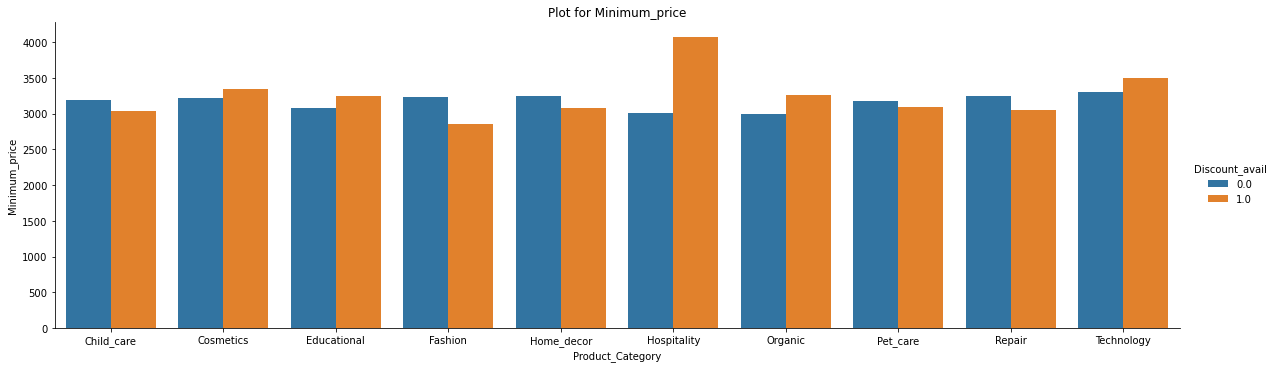

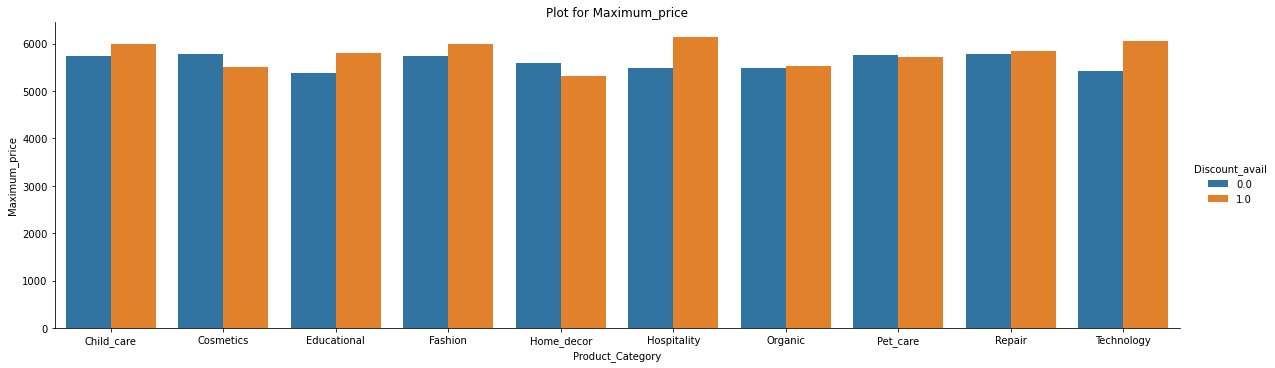

In [546]:
print(X.groupby(['Discount_avail','Product_Category']).agg(['count','median'])[['Minimum_price','Maximum_price']])

df = X.groupby(['Discount_avail','Product_Category']).median()[['Minimum_price','Maximum_price']].reset_index()
for var in ['Minimum_price','Maximum_price']:
    sns.factorplot(x = 'Product_Category' , y = var, data = df, hue = 'Discount_avail',kind = 'bar',aspect=20/6)
    plt.title(f'Plot for {var}')
    plt.show()

In [547]:
print(X.groupby('Product_Category').agg(['count','median'])[['Minimum_price','Maximum_price']])

                 Minimum_price         Maximum_price        
                         count  median         count  median
Product_Category                                            
Child_care                 650  3164.0           610  5757.5
Cosmetics                  641  3231.0           611  5772.0
Educational                600  3083.0           570  5456.0
Fashion                    601  3218.0           567  5815.0
Home_decor                 605  3188.0           582  5509.5
Hospitality                623  3108.0           592  5611.5
Organic                    609  3040.0           595  5504.0
Pet_care                   670  3162.5           645  5754.0
Repair                     659  3245.0           626  5799.5
Technology                 612  3312.5           571  5485.0


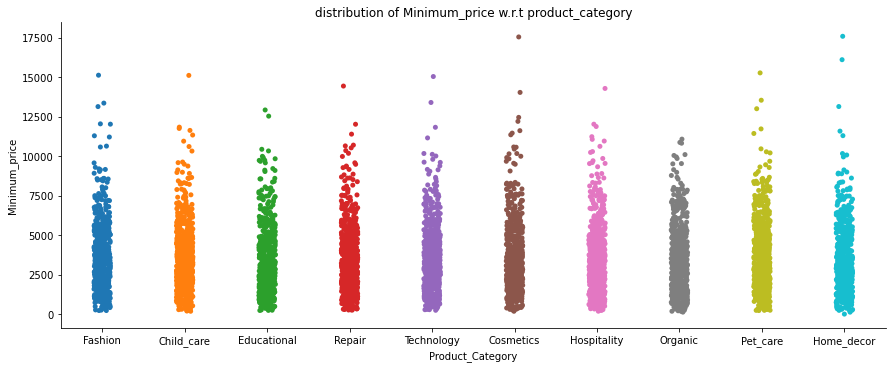

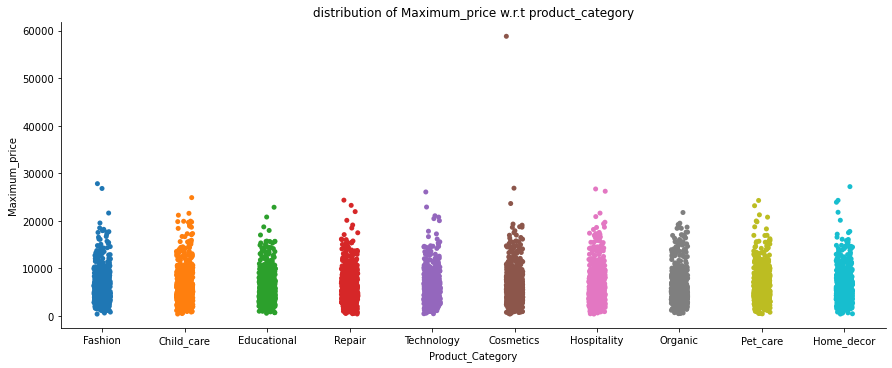

In [548]:
for var in ['Minimum_price','Maximum_price']:
    sns.catplot(x = 'Product_Category', y = var, data = X, aspect = 20/8)
    plt.title(f'distribution of {var} w.r.t product_category')
    plt.show()

In [549]:
X.groupby('Grade').agg(['count','median'])[['Minimum_price','Maximum_price']]

Minimum_price         Maximum_price        
              count  median         count  median
Grade                                            
0              4314  3311.5          4092  5515.0
1               376  4047.0           356  7391.0
2              1081  2376.0          1041  5253.0
3               499  3173.0           480  9911.0

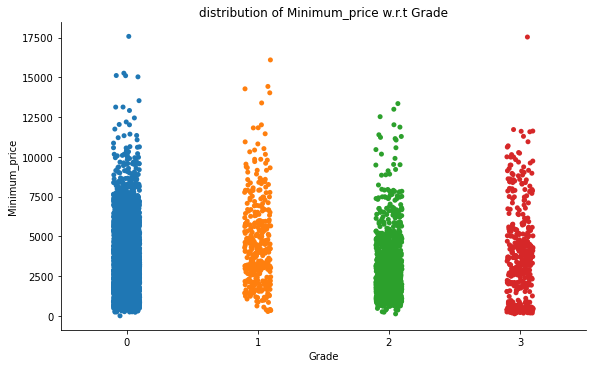

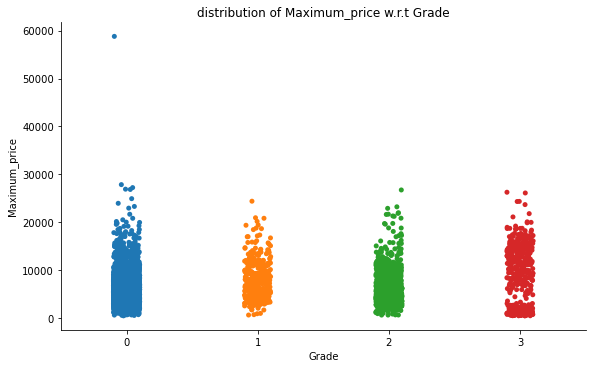

In [550]:
for var in ['Minimum_price','Maximum_price']:
    sns.catplot(x = 'Grade', y = var, data = X, aspect = 10/6)
    plt.title(f'distribution of {var} w.r.t Grade')
    plt.show()

- We will go with Grade a we can see grade wise maximum and minimum values are little different compared to by product_category.

<!-- - first we need to see the correlation between other variables with maximum and mi9nimum prices and take those variables with high absolute correlation.But here most of the variables are categorical and as price is continuous so we can not measure true association via correlation and we have to use correlation ratio or some other metrics. Here we can see also that no variable is highly correlated with these twovariables. SDo we will try different variables by grouping to see some pattern.
- if we see the prvious graphs and tables for maximum and minimum prices across different variables we can notice that based on grade different product categry has different maximum and minimum values.
- We can use discount also but as missing value is there in discount variable so it is quite obvious that we can lose many information where missing value is handled for discount variable. -->

In [551]:
minimum_dict = X.groupby('Grade').median()['Minimum_price'].to_dict()
maximum_dict = X.groupby('Grade').median()['Maximum_price'].to_dict()

In [552]:
for var,dictionary in zip(['Minimum_price','Maximum_price'],[minimum_dict,maximum_dict]):
    for row in list(X[X[var].isna()].index):
        for row_dict in range(len(list(dictionary.keys()))):
            if (X.loc[row,'Grade'] == list(dictionary.keys())[row_dict]):
                    X.loc[row,var] = list(dictionary.values())[row_dict]
        

In [553]:
X.isna().sum()

Product_id             0
Stall_no               0
instock_date           0
Market_Category        0
Customer_name        206
Loyalty_customer       0
Product_Category       0
Grade                  0
Demand                 0
Discount_avail         0
charges_1            197
charges_2 (%)          0
Minimum_price          0
Maximum_price          0
charges_2_missing      0
dtype: int64

In [554]:
# # Now we impute these median values (as these values have outliers) in minimum and maximum price 
# X_train['Minimum_price'] = X_train['Minimum_price'].fillna(X_train['Minimum_price'].median())
# X_train['Maximum_price'] = X_train['Maximum_price'].fillna(X_train['Maximum_price'].median())

# X_test['Minimum_price'] = X_test['Minimum_price'].fillna(X_test['Minimum_price'].median())
# X_test['Maximum_price'] = X_test['Maximum_price'].fillna(X_test['Maximum_price'].median())

In [555]:
# X_train['charges_1_new'] = X_train['charges_1'].apply(lambda x: np.nan if math.isnan(x) else 1 if x > 400 else 0)
# X_test['charges_1_new'] = X_test['charges_1'].apply(lambda x: np.nan if math.isnan(x) else 1 if x > 400 else 0)

In [556]:
# X_train.drop(['charges_1'],axis = 1,inplace= True)
# X_test.drop(['charges_1'],axis = 1,inplace= True)

In [557]:
X.head()

Product_id  Stall_no             instock_date  Market_Category  \
0  BRAE2NF6JA5GUEXG      37.0  2015-08-22 18:36:12.000                2   
1  TUNE8SFB6RJN2HSD      38.0  2016-03-27 21:19:13.000               24   
2  BRAEAR7WZPQGPBZU       9.0  2015-08-18 19:25:22.000              447   
3  WATDZ2ZQ8JPDHCTJ      50.0  2016-03-28 21:53:01.000               23   
4  JWSEBUKYQPMBZ3RK       7.0  2016-03-29 22:58:53.000               63   

  Customer_name Loyalty_customer Product_Category  Grade  Demand  \
0      Lillyann              Yes          Fashion      1      68   
1         Klynn              Yes          Fashion      0      51   
2         Ridge              Yes       Child_care      0      10   
3         Abran              Yes      Educational      2      48   
4        Dustyn              Yes           Repair      1      35   

   Discount_avail  charges_1  charges_2 (%)  Minimum_price  Maximum_price  \
0             0.0      376.0           11.0         2983.0         4713.0   
1             0.0      397.0           12.0         7495.0        10352.0   
2             0.0      250.0            9.0         5752.0         7309.0   
3             0.0      144.0           13.0         5090.0        20814.0   
4             1.0      211.0            4.0         2430.0         9261.0   

   charges_2_missing  
0                  0  
1                  0  
2                  0  
3                  0  
4                  0

#### Charges_1

In [558]:
X.groupby(['Product_Category']).agg(['count','median'])['charges_1']

count  median
Product_Category               
Child_care          634   300.0
Cosmetics           629   250.0
Educational         588   136.0
Fashion             578   374.0
Home_decor          581   252.0
Hospitality         603   275.0
Organic             604   125.0
Pet_care            659   151.0
Repair              641   248.0
Technology          594   559.0

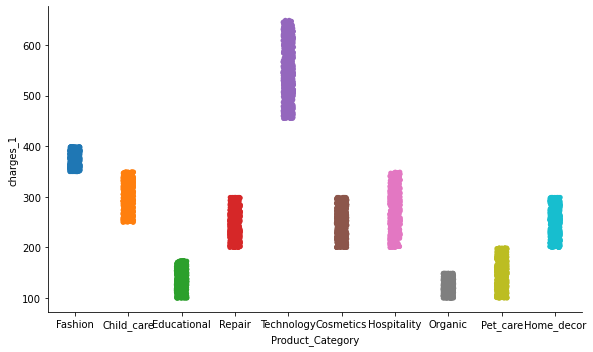

In [559]:
sns.catplot(x = 'Product_Category', y = 'charges_1', data = X, aspect = 10/6)

- As we can see charges_1 differs quite a lot for different product categories despite of having similar no. of counts.

In [560]:
X.groupby(['Grade']).agg(['count','median'])['charges_1']

count  median
Grade               
0       4199   254.0
1        363   255.0
2       1065   247.0
3        484   252.0

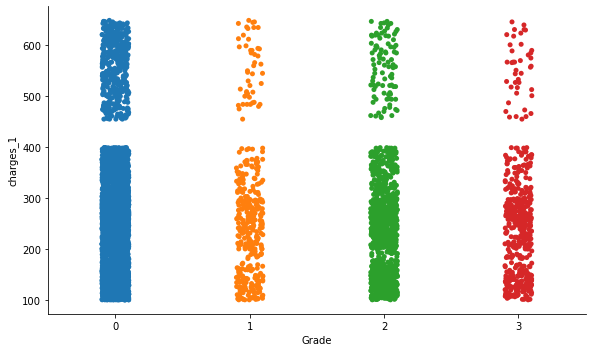

In [561]:
sns.catplot(x = 'Grade', y = 'charges_1', data = X, aspect = 10/6)

- As we can see for other variables except product_categry charges_1 is quite imbalanced (imbalanced data means somewhere one class is quite high in number and somewhere it is quite low that can not be used for generalisation as less data does not imply less priority)  in count and the variation is not captured well also so we will go with product_category to impute charges_1 values.


In [562]:
charges_1_dict = X.groupby(['Product_Category']).median()['charges_1'].to_dict()
charges_1_dict

{'Child_care': 300.0,
 'Cosmetics': 250.0,
 'Educational': 136.0,
 'Fashion': 374.0,
 'Home_decor': 252.0,
 'Hospitality': 275.0,
 'Organic': 125.0,
 'Pet_care': 151.0,
 'Repair': 248.0,
 'Technology': 559.0}

In [563]:
for row in list(X[X['charges_1'].isna()].index):
    for key in list(charges_1_dict.keys()):
        if  X.loc[row,'Product_Category'] == key:
            X.loc[row,'charges_1'] = charges_1_dict[key]


In [564]:
# X_train['charges_1_new'] = X_train['charges_1_new'].fillna(X_train['charges_1_new'].mode()[0])
# X_test['charges_1_new'] = X_test['charges_1_new'].fillna(X_test['charges_1_new'].mode()[0])

In [565]:
X.isna().sum()

Product_id             0
Stall_no               0
instock_date           0
Market_Category        0
Customer_name        206
Loyalty_customer       0
Product_Category       0
Grade                  0
Demand                 0
Discount_avail         0
charges_1              0
charges_2 (%)          0
Minimum_price          0
Maximum_price          0
charges_2_missing      0
dtype: int64

#### Categorical data handling

In [566]:
X.drop(['Product_id','Customer_name'],axis = 1,inplace = True)

In [567]:
# stall_freq_dict_train = X_train['Stall_no'].value_counts().to_dict()
# stall_freq_dict_train

In [568]:
# !pip install category_encoders
from category_encoders import *

#Create object for binary encoding
# encoder= ce.BinaryEncoder(cols=['city'],return_df=True)

In [569]:
enc = BinaryEncoder(cols=['Stall_no'],return_df=True)
X = enc.fit_transform(X)

In [570]:
# X_train['Stall_no'] = X_train['Stall_no'].map(stall_freq_dict_train)

In [571]:
X.head()

Stall_no_0  Stall_no_1  Stall_no_2  Stall_no_3  Stall_no_4  Stall_no_5  \
0           0           0           0           0           0           0   
1           0           0           0           0           0           1   
2           0           0           0           0           0           1   
3           0           0           0           0           1           0   
4           0           0           0           0           1           0   

   Stall_no_6             instock_date  Market_Category Loyalty_customer  \
0           1  2015-08-22 18:36:12.000                2              Yes   
1           0  2016-03-27 21:19:13.000               24              Yes   
2           1  2015-08-18 19:25:22.000              447              Yes   
3           0  2016-03-28 21:53:01.000               23              Yes   
4           1  2016-03-29 22:58:53.000               63              Yes   

  Product_Category  Grade  Demand  Discount_avail  charges_1  charges_2 (%)  \
0          Fashion      1      68             0.0      376.0           11.0   
1          Fashion      0      51             0.0      397.0           12.0   
2       Child_care      0      10             0.0      250.0            9.0   
3      Educational      2      48             0.0      144.0           13.0   
4           Repair      1      35             1.0      211.0            4.0   

   Minimum_price  Maximum_price  charges_2_missing  
0         2983.0         4713.0                  0  
1         7495.0        10352.0                  0  
2         5752.0         7309.0                  0  
3         5090.0        20814.0                  0  
4         2430.0         9261.0                  0

In [572]:
# stall_freq_dict_test = X_test['Stall_no'].value_counts().to_dict()
# stall_freq_dict_test

In [573]:
# X_test['Stall_no'] = X_test['Stall_no'].map(stall_freq_dict_test)

In [574]:
# X_train_indices = X_train.index
# X_test_indices = X_test.index

# df = pd.concat([X_train,X_test],axis = 0)

# df = pd.get_dummies(df,columns=['Loyalty_customer','Product_Category','Discount_avail'],drop_first= True)

# df['hour'] = df['instock_date'].apply(lambda x: x[10:13])
# df.drop(['instock_date'],axis = 1, inplace = True)

# X_train = df.loc[X_train_indices,:]
# X_test = df.loc[X_test_indices,:]

In [575]:
X = pd.get_dummies(X,columns=['Loyalty_customer','Product_Category','Discount_avail'],drop_first= True)
X['hour'] = X['instock_date'].apply(lambda x: x[10:13])
X.drop(['instock_date'],axis = 1, inplace = True)

In [576]:
X

Stall_no_0  Stall_no_1  Stall_no_2  Stall_no_3  Stall_no_4  Stall_no_5  \
0              0           0           0           0           0           0   
1              0           0           0           0           0           1   
2              0           0           0           0           0           1   
3              0           0           0           0           1           0   
4              0           0           0           0           1           0   
...          ...         ...         ...         ...         ...         ...   
6363           0           0           1           0           0           1   
6364           0           0           1           1           1           1   
6365           0           0           1           0           0           1   
6366           0           0           1           0           1           1   
6367           0           1           0           1           1           0   

      Stall_no_6  Market_Category  Grade  Demand  ...  \
0              1                2      1      68  ...   
1              0               24      0      51  ...   
2              1              447      0      10  ...   
3              0               23      2      48  ...   
4              1               63      1      35  ...   
...          ...              ...    ...     ...  ...   
6363           0               24      0      47  ...   
6364           1               55      0      35  ...   
6365           1              358      3      29  ...   
6366           0              452      0       8  ...   
6367           1               58      0      94  ...   

      Product_Category_Educational  Product_Category_Fashion  \
0                                0                         1   
1                                0                         1   
2                                0                         0   
3                                1                         0   
4                                0                         0   
...                            ...                       ...   
6363                             0                         0   
6364                             0                         0   
6365                             0                         0   
6366                             0                         0   
6367                             0                         0   

      Product_Category_Home_decor  Product_Category_Hospitality  \
0                               0                             0   
1                               0                             0   
2                               0                             0   
3                               0                             0   
4                               0                             0   
...                           ...                           ...   
6363                            0                             0   
6364                            0                             0   
6365                            0                             0   
6366                            0                             0   
6367                            0                             0   

      Product_Category_Organic  Product_Category_Pet_care  \
0                            0                          0   
1                            0                          0   
2                            0                          0   
3                            0                          0   
4                            0                          0   
...                        ...                        ...   
6363                         0                          0   
6364                         0                          0   
6365                         0                          0   
6366                         0                          0   
6367                         0                          0   

      Product_Category_Repair  Product_Category_Techn

In [577]:
hour_freq_dict = X['hour'].value_counts().to_dict()
hour_freq_dict

{' 17': 569,
 ' 21': 468,
 ' 16': 455,
 ' 20': 451,
 ' 14': 444,
 ' 15': 441,
 ' 13': 388,
 ' 19': 377,
 ' 23': 344,
 ' 22': 303,
 ' 04': 243,
 ' 05': 242,
 ' 00': 234,
 ' 03': 210,
 ' 06': 210,
 ' 07': 198,
 ' 18': 179,
 ' 01': 171,
 ' 02': 153,
 ' 08': 94,
 ' 12': 35,
 ' 11': 34,
 ' 09': 33,
 ' 10': 32}

In [578]:
X['hour'] = X['hour'].map(hour_freq_dict)

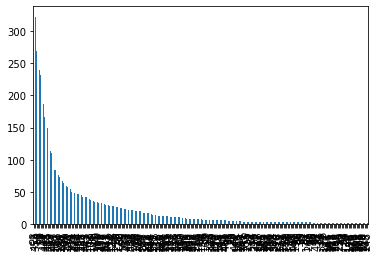

In [579]:
X['Market_Category'].value_counts().plot(kind = 'bar')

In [580]:
# market_cat_freq_dict = X_train['Market_Category'].value_counts().to_dict()
# market_cat_freq_dict

In [581]:
# X_train['Market_Category'] = X_train['Market_Category'].map(market_cat_freq_dict)

In [582]:
# # test data
# for row in list(X_test.index):
#     for key in list(market_cat_freq_dict.keys()):
#         try:
#             if X_test.loc[row,'Market_Category'] == key:
#                 X_test.loc[row,'Market_Category'] = market_cat_freq_dict[key]
#         except:
#             X_test.loc[row,'Market_Category'] = 0

In [583]:
enc_market = BinaryEncoder(cols=['Market_Category'],return_df=True)
X = enc_market.fit_transform(X)

In [584]:
X.head()

Stall_no_0  Stall_no_1  Stall_no_2  Stall_no_3  Stall_no_4  Stall_no_5  \
0           0           0           0           0           0           0   
1           0           0           0           0           0           1   
2           0           0           0           0           0           1   
3           0           0           0           0           1           0   
4           0           0           0           0           1           0   

   Stall_no_6  Market_Category_0  Market_Category_1  Market_Category_2  ...  \
0           1                  0                  0                  0  ...   
1           0                  0                  0                  0  ...   
2           1                  0                  0                  0  ...   
3           0                  0                  0                  0  ...   
4           1                  0                  0                  0  ...   

   Product_Category_Educational  Product_Category_Fashion  \
0                             0                         1   
1                             0                         1   
2                             0                         0   
3                             1                         0   
4                             0                         0   

   Product_Category_Home_decor  Product_Category_Hospitality  \
0                            0                             0   
1                            0                             0   
2                            0                             0   
3                            0                             0   
4                            0                             0   

   Product_Category_Organic  Product_Category_Pet_care  \
0                         0                          0   
1                         0                          0   
2                         0                          0   
3                         0                          0   
4                         0                          0   

   Product_Category_Repair  Product_Category_Technology  Discount_avail_1.0  \
0                        0                            0                   0   
1                        0                            0                   0   
2                        0                            0                   0   
3                        0                            0                   0   
4                        1                            0                   1   

   hour  
0   179  
1   468  
2   377  
3   468  
4   303  

[5 rows x 35 columns]

In [585]:
# X_train['ref_price'] = (X_train['Minimum_price'] + X_train['Maximum_price'])/2
# X_test['ref_price'] = (X_test['Minimum_price'] + X_test['Maximum_price'])/2

# X_train.drop(['Minimum_price', 'Maximum_price'],axis = 1,inplace = True)
# X_test.drop(['Minimum_price', 'Maximum_price'],axis = 1,inplace = True)

In [586]:
X.columns

Index(['Stall_no_0', 'Stall_no_1', 'Stall_no_2', 'Stall_no_3', 'Stall_no_4',
       'Stall_no_5', 'Stall_no_6', 'Market_Category_0', 'Market_Category_1',
       'Market_Category_2', 'Market_Category_3', 'Market_Category_4',
       'Market_Category_5', 'Market_Category_6', 'Market_Category_7',
       'Market_Category_8', 'Grade', 'Demand', 'charges_1', 'charges_2 (%)',
       'Minimum_price', 'Maximum_price', 'charges_2_missing',
       'Loyalty_customer_Yes', 'Product_Category_Cosmetics',
       'Product_Category_Educational', 'Product_Category_Fashion',
       'Product_Category_Home_decor', 'Product_Category_Hospitality',
       'Product_Category_Organic', 'Product_Category_Pet_care',
       'Product_Category_Repair', 'Product_Category_Technology',
       'Discount_avail_1.0', 'hour'],
      dtype='object')

#### outlier checking

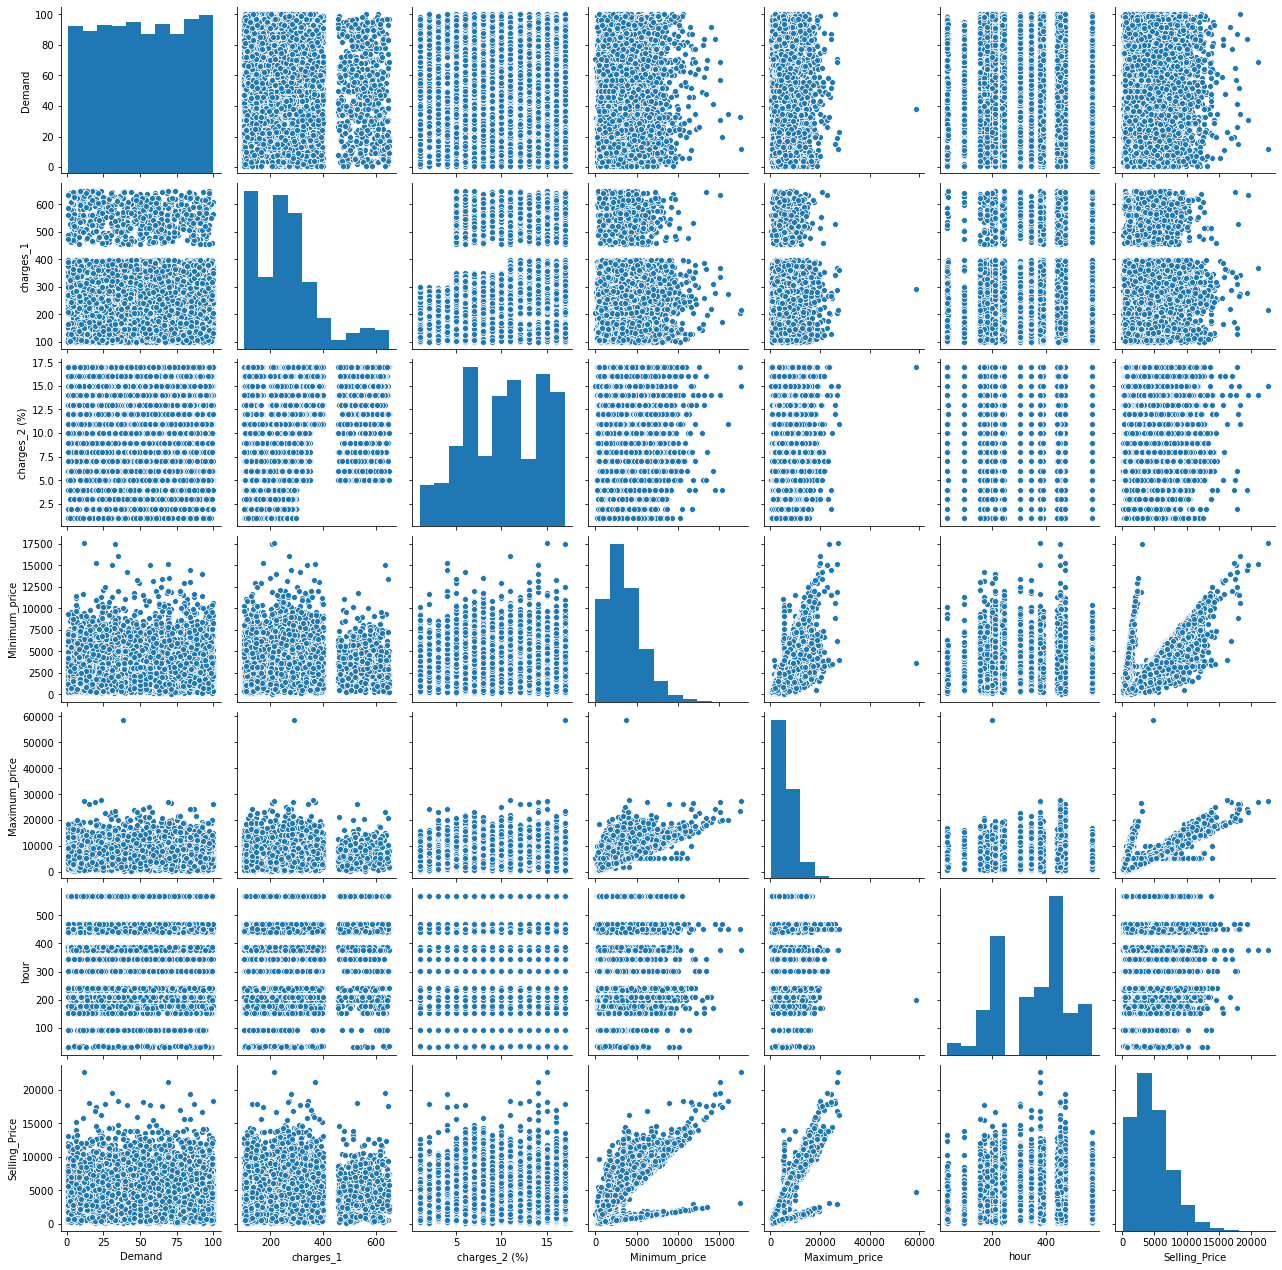

In [587]:
X_continuous_vars = [var for var in X.columns if len(X[var].unique()) > 10]
sns.pairplot(pd.concat([X[X_continuous_vars],y],axis = 1))

In [588]:
# We can see so many outliers for maximum and minimum price
for var in ['Maximum_price','Minimum_price']:
# for var in ['ref_price','charges_1']:
    Q1 = X[var].quantile(.25)
    Q3 = X[var].quantile(.75)
    IQR = Q3 - Q1
    upper_range = Q3 + (2*IQR)
    lower_range = Q1 - (2*IQR)
    
    print(f"upper range for {var} is {upper_range}")
    print(f"lower range for {var} is {lower_range}")
    
    # As these are positively skewed so we can find outliers only in right tails
    X[var] = X[var].apply(lambda x: upper_range if x > upper_range else x)


upper range for Maximum_price is 15934.75
lower range for Maximum_price is -3921.5
upper range for Minimum_price is 10303.25
lower range for Minimum_price is -3719.25


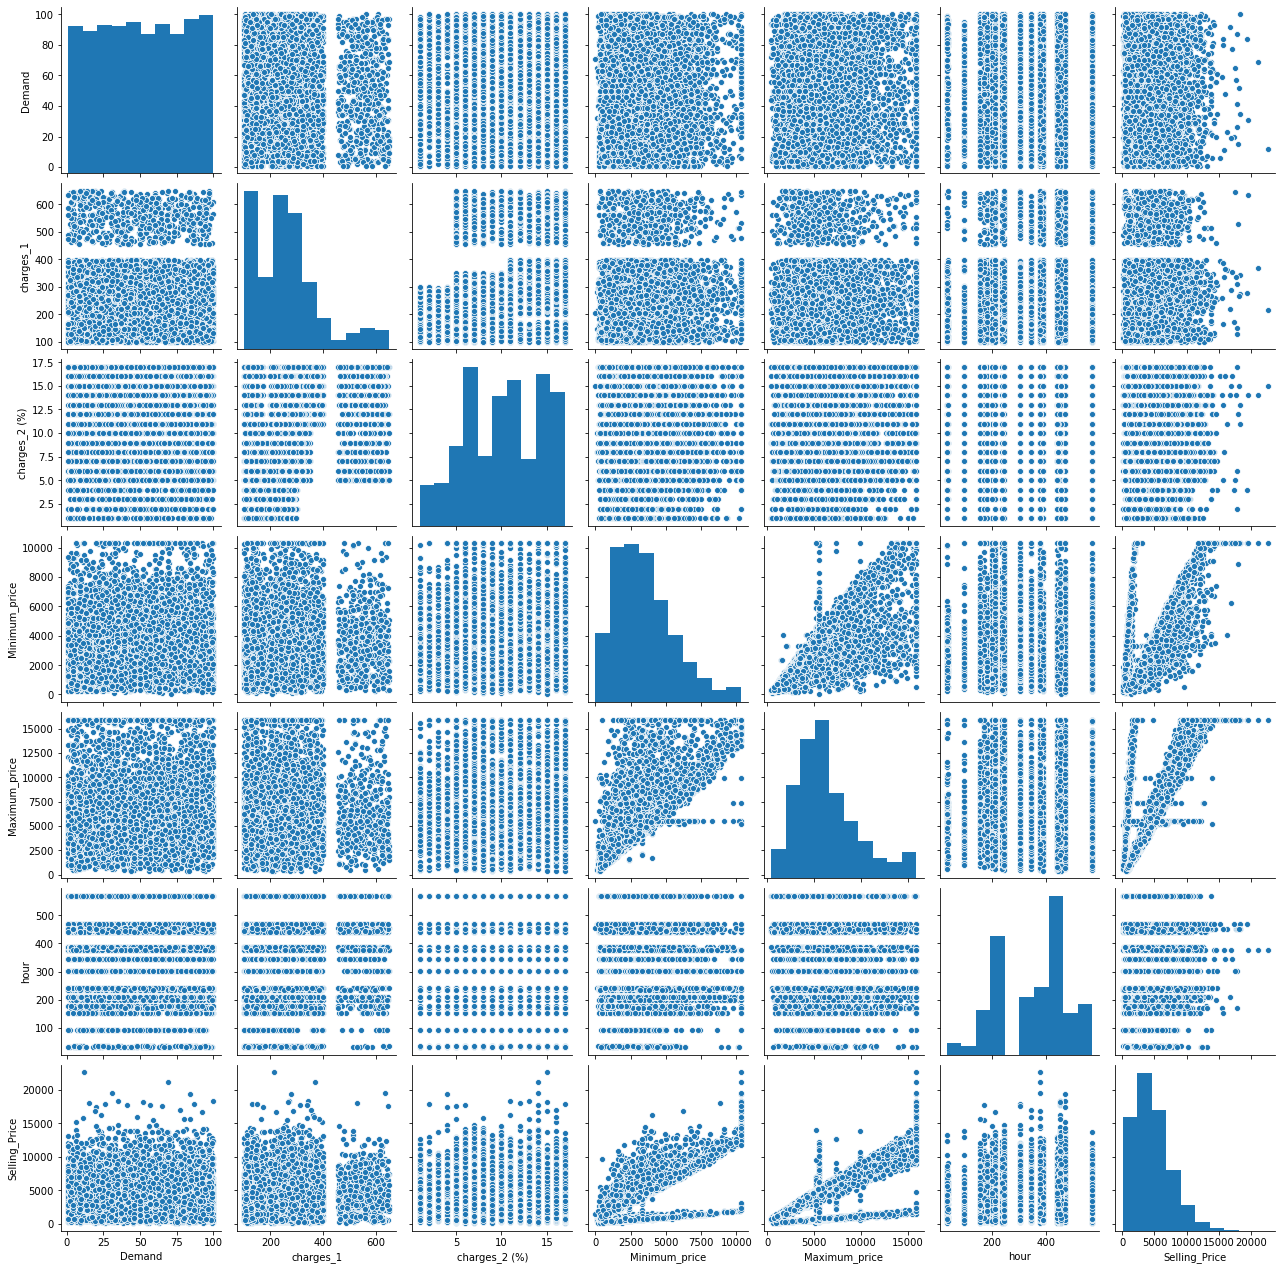

In [589]:
sns.pairplot(pd.concat([X[X_continuous_vars],y],axis = 1))

#### Feature Transformation

In [590]:
# for var in ['Discount_avail','charges_2 (%)']:
#     X_train[var] = X_train[var].astype('int')
#     X_test[var] = X_test[var].astype('int')
X['charges_2 (%)'] = X['charges_2 (%)'].astype('int')

In [591]:
# X_train1 = X_train.copy()
# X_test1 = X_test.copy()

In [592]:

X['Maximum_price'] = np.sqrt(X['Maximum_price'])
X['Minimum_price'] = np.sqrt(X['Minimum_price'])
# X['ref_price'] = np.sqrt(X['ref_price'])
X['charges_1'] = np.log(X['charges_1'])
X['charges_2 (%)'] = np.log(X['charges_2 (%)'])

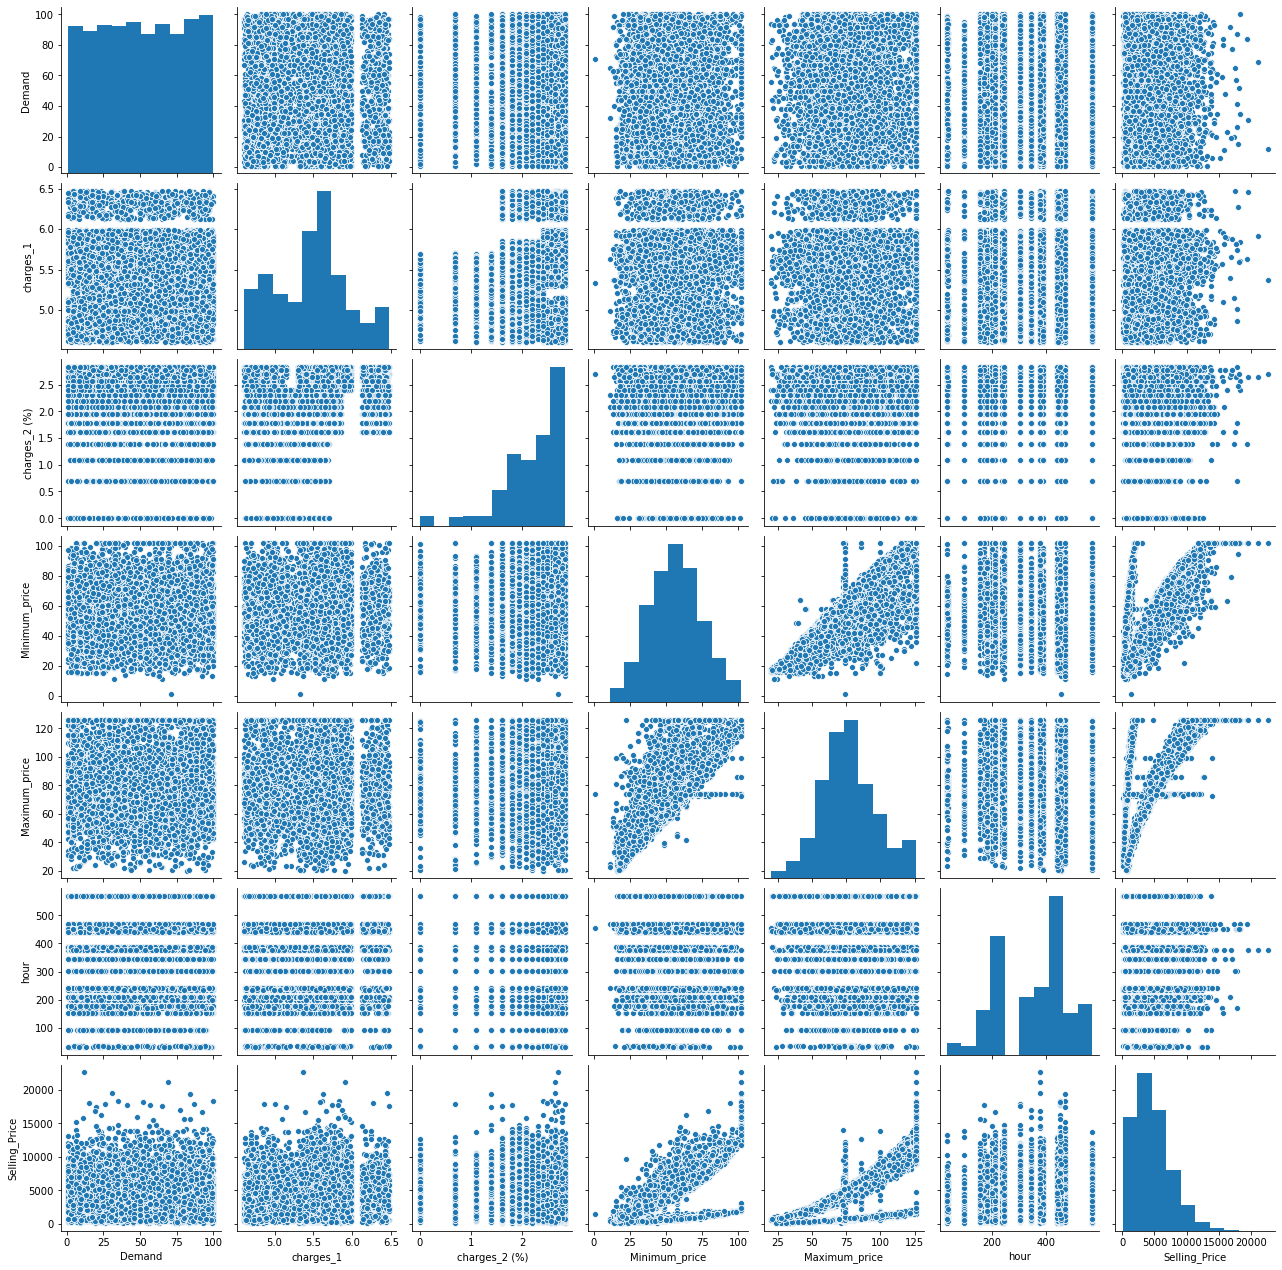

In [593]:
sns.pairplot(pd.concat([X[X_continuous_vars],y],axis = 1))

In [594]:
y = np.sqrt(y)

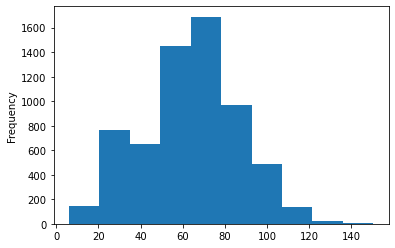

In [595]:
pd.Series(y).plot(kind = 'hist')

#### Scaling

In [596]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X),columns= X.columns)

In [597]:
X.head()

Stall_no_0  Stall_no_1  Stall_no_2  Stall_no_3  Stall_no_4  Stall_no_5  \
0         0.0   -0.787355    -0.77499    -0.94507   -0.954733   -0.984895   
1         0.0   -0.787355    -0.77499    -0.94507   -0.954733    1.015336   
2         0.0   -0.787355    -0.77499    -0.94507   -0.954733    1.015336   
3         0.0   -0.787355    -0.77499    -0.94507    1.047413   -0.984895   
4         0.0   -0.787355    -0.77499    -0.94507    1.047413   -0.984895   

   Stall_no_6  Market_Category_0  Market_Category_1  Market_Category_2  ...  \
0    0.975568                0.0          -0.284715          -0.571492  ...   
1   -1.025044                0.0          -0.284715          -0.571492  ...   
2    0.975568                0.0          -0.284715          -0.571492  ...   
3   -1.025044                0.0          -0.284715          -0.571492  ...   
4    0.975568                0.0          -0.284715          -0.571492  ...   

   Product_Category_Educational  Product_Category_Fashion  \
0                     -0.325706                  3.075878   
1                     -0.325706                  3.075878   
2                     -0.325706                 -0.325110   
3                      3.070252                 -0.325110   
4                     -0.325706                 -0.325110   

   Product_Category_Home_decor  Product_Category_Hospitality  \
0                    -0.326896                     -0.331628   
1                    -0.326896                     -0.331628   
2                    -0.326896                     -0.331628   
3                    -0.326896                     -0.331628   
4                    -0.326896                     -0.331628   

   Product_Category_Organic  Product_Category_Pet_care  \
0                 -0.329267                  -0.345877   
1                 -0.329267                  -0.345877   
2                 -0.329267                  -0.345877   
3                 -0.329267                  -0.345877   
4                 -0.329267                  -0.345877   

   Product_Category_Repair  Product_Category_Technology  Discount_avail_1.0  \
0                -0.342997                    -0.328971           -0.402644   
1                -0.342997                    -0.328971           -0.402644   
2                -0.342997                    -0.328971           -0.402644   
3                -0.342997                    -0.328971           -0.402644   
4                 2.915476                    -0.328971            2.483582   

       hour  
0 -1.339615  
1  0.848073  
2  0.159217  
3  0.848073  
4 -0.400953  

[5 rows x 35 columns]

#### Feature Selection

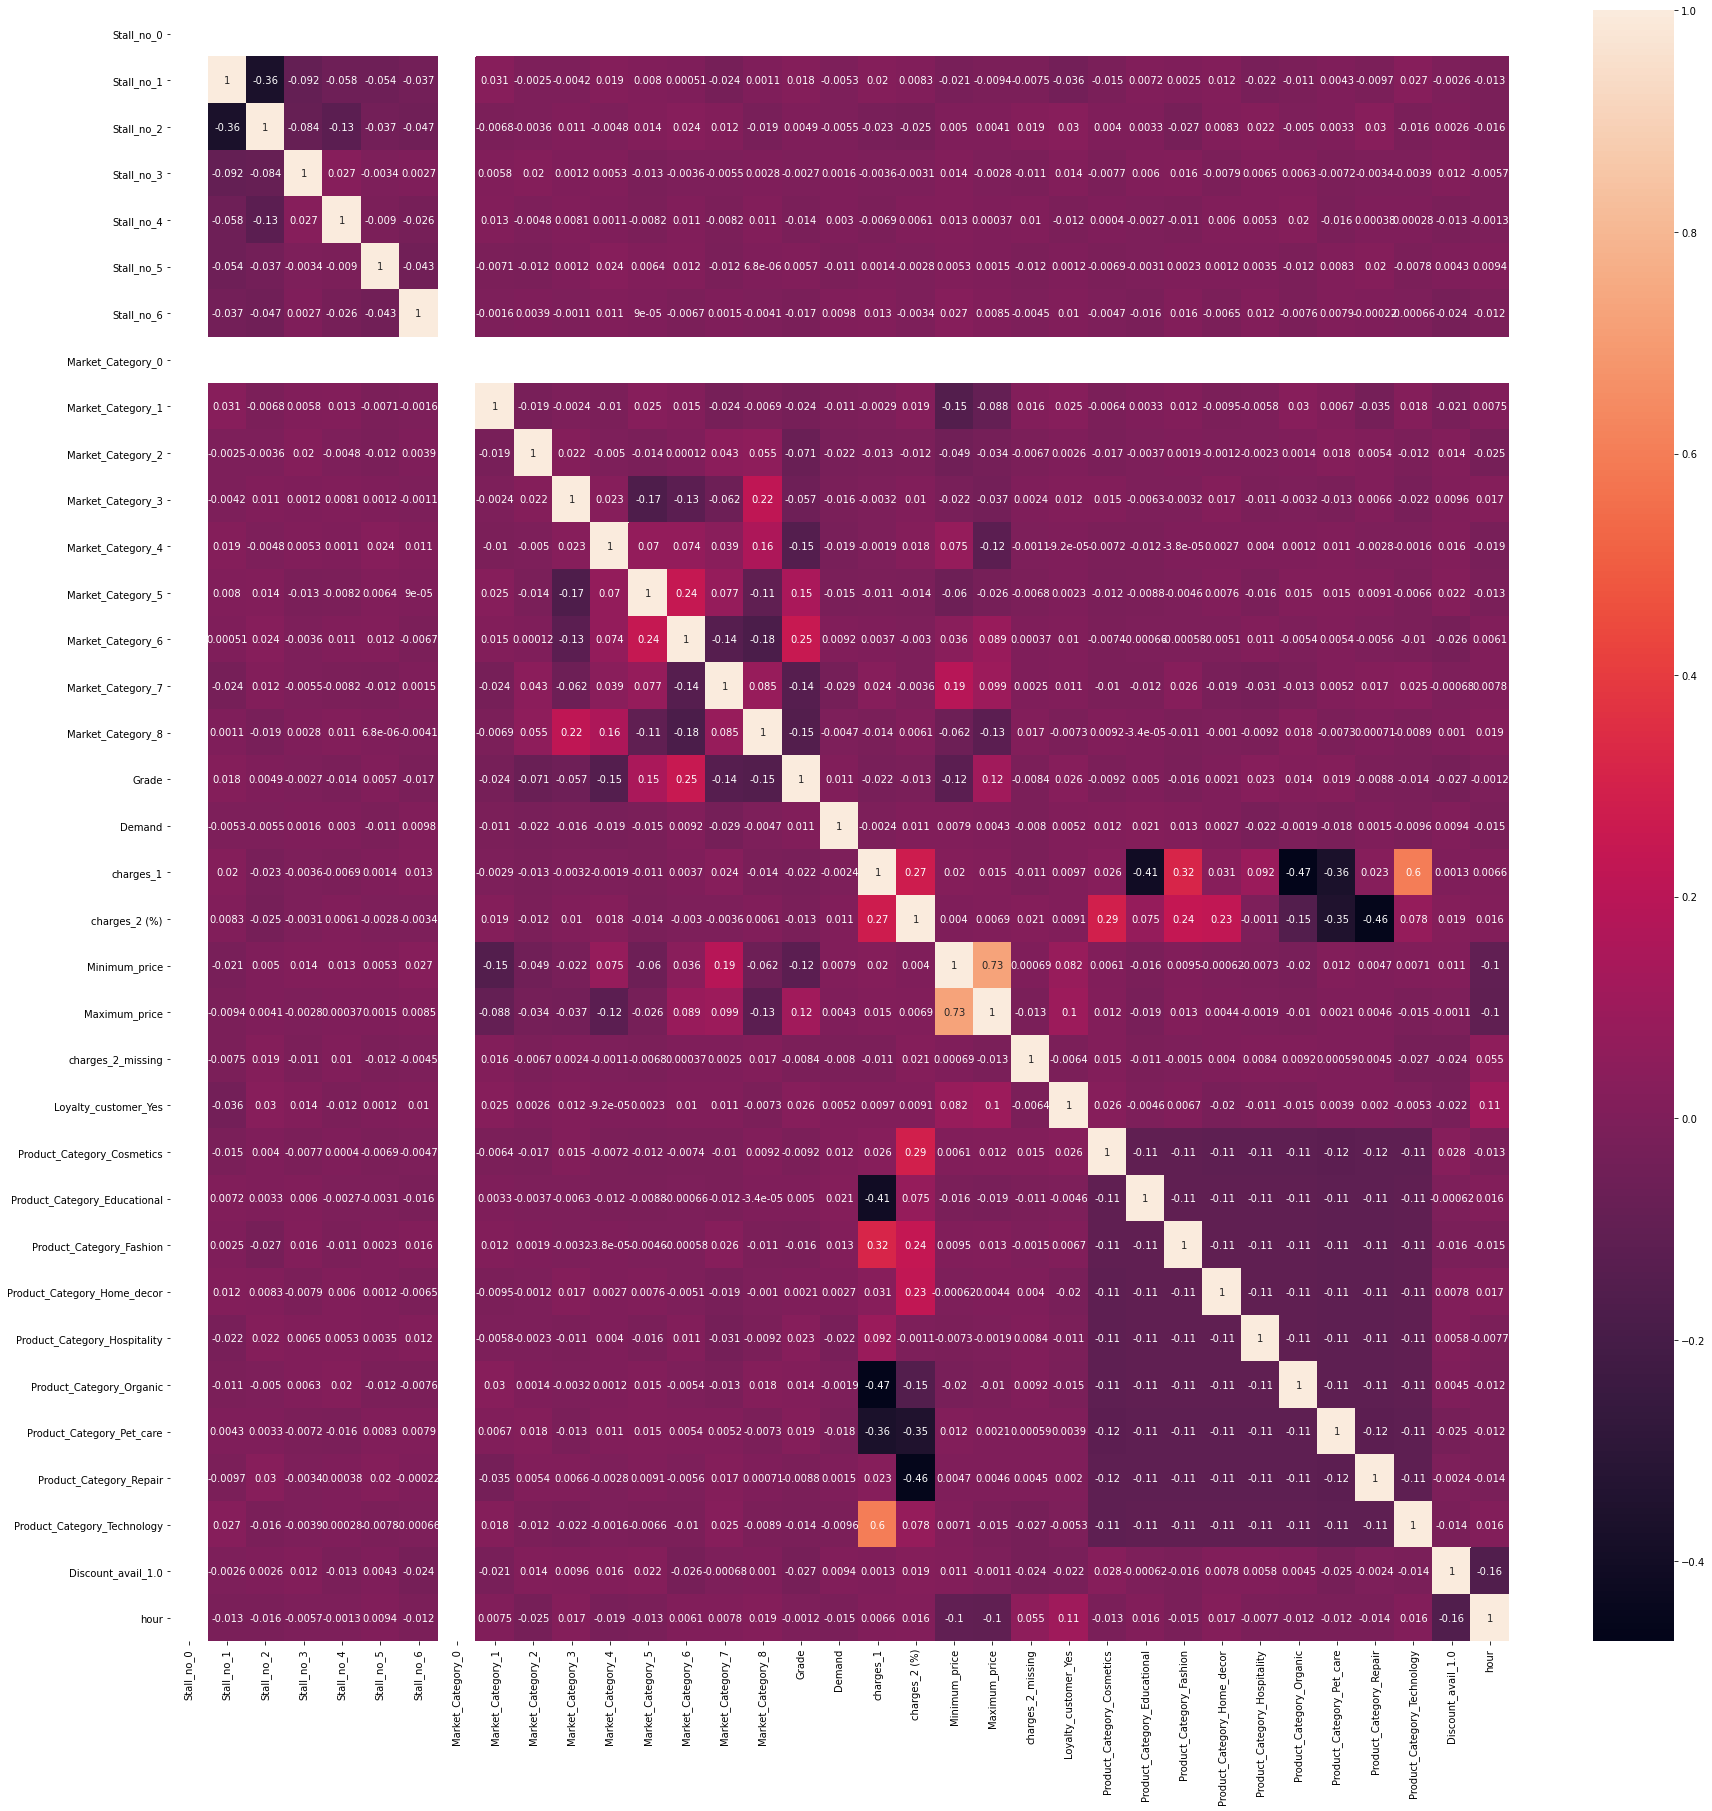

In [598]:
fig = plt.figure(figsize = (30,30))
cor = X.corr()
sns.heatmap(cor,annot= True)

In [599]:
X = X.drop('Product_Category_Technology',axis = 1)

In [600]:
# VIF checking
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif = vif.sort_values("VIF",axis = 0,ascending = False).reset_index(drop= "first")
    
    return(vif)

In [601]:
calc_vif(X)

variables       VIF
0                      charges_1  5.920230
1       Product_Category_Organic  4.895843
2      Product_Category_Pet_care  4.398462
3   Product_Category_Educational  4.271510
4                  Minimum_price  2.601936
5                  Maximum_price  2.521707
6        Product_Category_Repair  2.488523
7                  charges_2 (%)  2.037814
8     Product_Category_Cosmetics  2.032141
9    Product_Category_Home_decor  1.936531
10  Product_Category_Hospitality  1.752493
11      Product_Category_Fashion  1.395134
12                         Grade  1.240462
13                    Stall_no_2  1.219754
14                    Stall_no_1  1.206708
15             Market_Category_6  1.196383
16             Market_Category_8  1.141815
17             Market_Category_4  1.137887
18             Market_Category_5  1.132026
19             Market_Category_7  1.113364
20             Market_Category_3  1.088726
21                          hour  1.066761
22             Market_Category_1  1.038538
23                    Stall_no_4  1.033707
24          Loyalty_customer_Yes  1.033253
25            Discount_avail_1.0  1.033153
26                    Stall_no_3  1.027937
27             Market_Category_2  1.019263
28                    Stall_no_6  1.012940
29                    Stall_no_5  1.012562
30             charges_2_missing  1.007409
31                        Demand  1.004824
32                    Stall_no_0       NaN
33             Market_Category_0       NaN

- No such significant multicolinearity

In [602]:
from sklearn.ensemble import ExtraTreesRegressor
ex_reg = ExtraTreesRegressor()
ex_reg.fit(X,y)
ex_reg.feature_importances_

array([0.00000000e+00, 4.48860905e-04, 5.26753552e-04, 3.99572039e-04,
       5.11557385e-04, 6.69929947e-04, 3.22041677e-04, 0.00000000e+00,
       5.43615280e-04, 9.40904321e-04, 3.98348224e-04, 1.12674830e-03,
       3.92718041e-04, 4.49499464e-04, 5.70091545e-04, 5.75036260e-04,
       2.59628116e-03, 6.56285499e-04, 2.03602441e-03, 5.91596932e-04,
       1.93304825e-01, 3.67960892e-01, 1.76388106e-04, 5.19574399e-04,
       2.18993241e-04, 4.77005780e-04, 2.07879108e-04, 4.49897011e-04,
       1.66585954e-04, 2.85185721e-04, 1.70692651e-04, 3.00770118e-04,
       4.21182221e-01, 8.23224731e-04])

In [603]:
df = pd.DataFrame({'Feature': list(X.columns), 'Score' : ex_reg.feature_importances_}).sort_values(by = 'Score',axis = 0,ascending = False).reset_index(drop= 'first')
df

Feature     Score
0             Discount_avail_1.0  0.421182
1                  Maximum_price  0.367961
2                  Minimum_price  0.193305
3                          Grade  0.002596
4                      charges_1  0.002036
5              Market_Category_4  0.001127
6              Market_Category_2  0.000941
7                           hour  0.000823
8                     Stall_no_5  0.000670
9                         Demand  0.000656
10                 charges_2 (%)  0.000592
11             Market_Category_8  0.000575
12             Market_Category_7  0.000570
13             Market_Category_1  0.000544
14                    Stall_no_2  0.000527
15          Loyalty_customer_Yes  0.000520
16                    Stall_no_4  0.000512
17  Product_Category_Educational  0.000477
18   Product_Category_Home_decor  0.000450
19             Market_Category_6  0.000449
20                    Stall_no_1  0.000449
21                    Stall_no_3  0.000400
22             Market_Category_3  0.000398
23             Market_Category_5  0.000393
24                    Stall_no_6  0.000322
25       Product_Category_Repair  0.000301
26      Product_Category_Organic  0.000285
27    Product_Category_Cosmetics  0.000219
28      Product_Category_Fashion  0.000208
29             charges_2_missing  0.000176
30     Product_Category_Pet_care  0.000171
31  Product_Category_Hospitality  0.000167
32             Market_Category_0  0.000000
33                    Stall_no_0  0.000000

In [604]:
cols = df.Feature[:3].to_list()
cols

['Discount_avail_1.0', 'Maximum_price', 'Minimum_price']

In [605]:
cols_new = [var for var in X.columns if var not in ['Minimum_price','Maximum_price']]

In [606]:
X_subset = X[cols]
X_subset.head()

Discount_avail_1.0  Maximum_price  Minimum_price
0           -0.402644      -0.400474      -0.103428
1           -0.402644       1.207688       1.672200
2           -0.402644       0.417926       1.075910
3           -0.402644       2.397678       0.826002
4            2.483582       0.939899      -0.399126

#### Splitting data


In [687]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [688]:
print(f'train data shape - {X_train.shape}')
print(f'validation data shape - {X_test.shape}')

train data shape - (4226, 34)
validation data shape - (2082, 34)


#### Model Selection

In [609]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)

LinearRegression()

In [610]:
from sklearn.metrics import r2_score,mean_squared_error
lin_reg.score(X_train,y_train)

0.9530705416938089

In [611]:
mean_squared_error(y_train,lin_reg.predict(X_train))

24.294829043912106

In [612]:
predictions = lin_reg.predict(X_test)


In [613]:
r2_score(y_test,predictions)

0.9498540497734891

In [614]:
mean_squared_error(y_test,predictions)

25.847914998586447

In [615]:
def adjus_r_sq(X,y,model):
    n = X.shape[0]
    k = X.shape[1]
    pred = model.predict(X)
    rsq = r2_score(y,pred)
    return 1 - ((1-rsq)*((n-1)/(n-k-1)))

In [616]:
adjus_r_sq(X_test,y_test,lin_reg)

0.9490211419534103

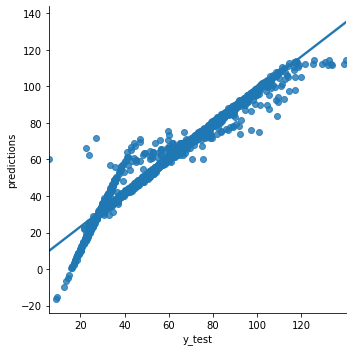

In [617]:
sns.lmplot('y_test','predictions',data = pd.DataFrame({"y_test" : y_test, "predictions" : predictions}))

In [618]:
from sklearn.ensemble import RandomForestRegressor
ran_for_reg = RandomForestRegressor()

In [619]:
ran_for_reg

RandomForestRegressor()

In [620]:
ran_for_reg.fit(X_train,y_train)

RandomForestRegressor()

In [621]:
ran_for_reg.score(X_train,y_train)

0.9979528324944426

In [622]:
pred = ran_for_reg.predict(X_test)

In [623]:
r2_score(y_test,pred)

0.985729564401166

In [624]:
adjus_r_sq(X_test,y_test,ran_for_reg)

0.9854925371367007

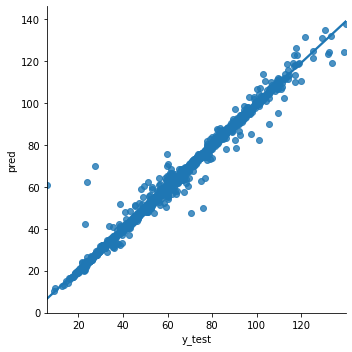

In [625]:
sns.lmplot('y_test','pred',data = pd.DataFrame({"y_test" : y_test, "pred" : pred}))

In [626]:
mean_squared_error(y_test,pred)

7.355748663357815

#### Checking for most important variables

In [627]:
X_subset_train, X_subset_test, y_subset_train, y_subset_test = train_test_split(X_subset, y, test_size=0.33, random_state=42)

In [628]:
ran_for_reg.fit(X_subset_train,y_subset_train)

RandomForestRegressor()

In [629]:
ran_for_reg.score(X_subset_train,y_subset_train)

0.9967432440538779

In [630]:
adjus_r_sq(X_subset_train,y_subset_train,ran_for_reg)

0.9967409299212776

In [631]:
pred_subset = ran_for_reg.predict(X_subset_test)

In [632]:
r2_score(y_subset_test,pred_subset)

0.9839905042518755

In [633]:
adjus_r_sq(X_subset_test,y_subset_test,ran_for_reg)

0.9839673914091207

In [634]:
mean_squared_error(y_subset_test,pred_subset)

8.252153631520585

> As we can see we can have a good adjusted r square so we will continue with 3 variables.

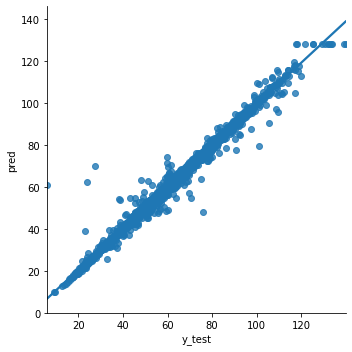

In [635]:
sns.lmplot('y_test','pred',data = pd.DataFrame({"y_test" : y_subset_test, "pred" : pred_subset}))

- Looking at prediction we can obviously say that as in part 1 we have seen some bad data where selling price is less than minimum price or selling price is greater than maximum price.
  These scattered points far from the distribution in above plot is due to that fact. So we need to cluster our data.

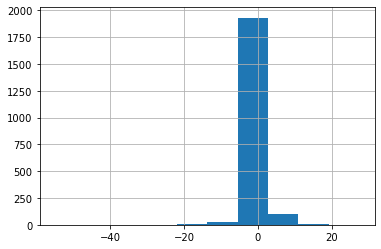

In [636]:
pd.Series(y_subset_test - pred_subset).hist()

- Here though theerrors are normally distributed still we can see some high errors for which the bar is quite big compared to others it is due to not clastering the data.

### Hyper parameter tuning


In [637]:
params = {'n_estimators' : [100,300,500,800,1000,1500],
         'min_samples_leaf' : [3,5,7,9],
         'min_samples_split' : [4,6,8,10,12],
         'max_depth' : [2,4,6,8,10,12,14]
         }

from sklearn.model_selection import RandomizedSearchCV


In [741]:
ran_for_reg = RandomForestRegressor()
ran_for_reg.fit(X_subset_train,y_subset_train)

RandomForestRegressor()

In [742]:
random_cv = RandomizedSearchCV(ran_for_reg,param_distributions = params,n_jobs = -1,cv = 5, verbose = 1)
random_cv.fit(X_subset_train,y_subset_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  1.9min finished


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [2, 4, 6, 8, 10, 12, 14],
                                        'min_samples_leaf': [3, 5, 7, 9],
                                        'min_samples_split': [4, 6, 8, 10, 12],
                                        'n_estimators': [100, 300, 500, 800,
                                                         1000, 1500]},
                   verbose=1)

In [743]:
best_model = random_cv.best_estimator_
best_model

RandomForestRegressor(max_depth=14, min_samples_leaf=3, min_samples_split=12,
                      n_estimators=1000)

In [744]:
best_model.fit(X_subset_train,y_subset_train)

RandomForestRegressor(max_depth=14, min_samples_leaf=3, min_samples_split=12,
                      n_estimators=1000)

In [745]:
best_model.score(X_subset_train,y_subset_train)

0.9901939328183597

In [746]:
pred = best_model.predict(X_subset_test)

In [747]:
r2_score(y_subset_test,pred)

0.9842245417222846

In [748]:
mean_squared_error(y_subset_test,pred)

8.131518154193047

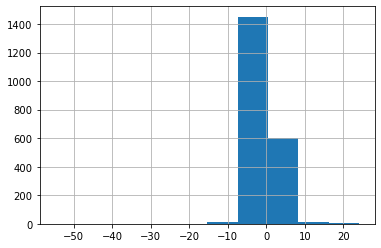

In [749]:
pd.Series(y_subset_test - pred).hist()

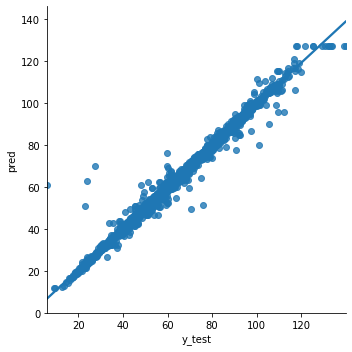

In [750]:
sns.lmplot('y_test','pred',data = pd.DataFrame({"y_test" : y_subset_test, "pred" : pred}))

In [689]:
random_cv2 = RandomizedSearchCV(ran_for_reg,param_distributions = params,n_jobs = -1,cv = 5, verbose = 1)
random_cv2.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  4.8min finished


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [2, 4, 6, 8, 10, 12, 14],
                                        'min_samples_leaf': [3, 5, 7, 9],
                                        'min_samples_split': [4, 6, 8, 10, 12],
                                        'n_estimators': [100, 300, 500, 800,
                                                         1000, 1500]},
                   verbose=1)

In [692]:
best_model2 = random_cv2.best_estimator_
best_model2

RandomForestRegressor(max_depth=14, min_samples_leaf=3, min_samples_split=10,
                      n_estimators=500)

0.9925367251010047
0.9854075443896023
7.52173506603124


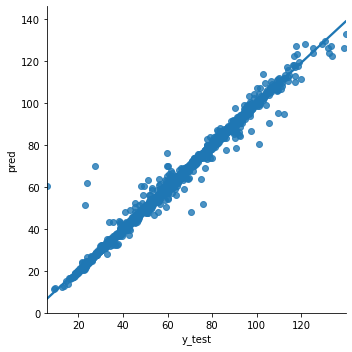

In [693]:
best_model2.fit(X_train,y_train)
print(best_model2.score(X_train,y_train))
pred2 = best_model2.predict(X_test)
print(r2_score(y_test,pred2))
print(mean_squared_error(y_test,pred2))
sns.lmplot('y_test','pred',data = pd.DataFrame({"y_test" : y_test, "pred" : pred2}))

### Clustering

In [647]:
from sklearn.cluster import KMeans

cost =[] 
for i in range(1, 11): 
    KM = KMeans(n_clusters = i, max_iter = 5000) 
    KM.fit(X_subset) 

    # calculates squared error 
    # for the clustered points 
    cost.append(KM.inertia_) 

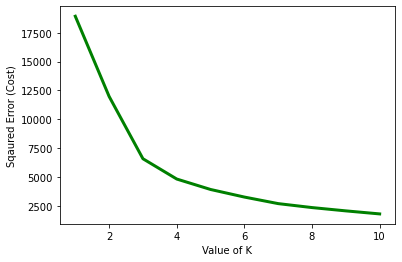

In [648]:
# plot the cost against K values 
plt.plot(range(1, 11), cost, color ='g', linewidth ='3') 
plt.xlabel("Value of K") 
plt.ylabel("Sqaured Error (Cost)") 
plt.show()

In [649]:
# We will take 2 clusters
KM = KMeans(n_clusters = 2, max_iter = 2000) 
cluster_values = KM.fit_predict(X_subset)
cluster_values

array([0, 1, 1, ..., 1, 1, 1])

In [650]:
import pickle
pickle_out = open(f"Kmeans_cluster.pkl","wb")
pickle.dump(KM, pickle_out)
pickle_out.close()

In [651]:
clustered_X = pd.concat([X_subset,pd.Series(cluster_values,name = 'Cluster')],axis = 1)
clustered_X.head()

Discount_avail_1.0  Maximum_price  Minimum_price  Cluster
0           -0.402644      -0.400474      -0.103428        0
1           -0.402644       1.207688       1.672200        1
2           -0.402644       0.417926       1.075910        1
3           -0.402644       2.397678       0.826002        1
4            2.483582       0.939899      -0.399126        1

In [669]:
clustered_X.tail()

Discount_avail_1.0  Maximum_price  Minimum_price  Cluster
6303           -0.402644       1.421341       1.885370        1
6304           -0.402644      -0.327999       0.178967        0
6305           -0.402644       2.137962       0.908095        1
6306           -0.402644      -0.020102       0.519786        1
6307           -0.402644      -0.171222       0.365013        1

In [652]:
KM.cluster_centers_

array([[-0.0272536 , -0.6548131 , -0.67030565],
       [ 0.03410104,  0.81933431,  0.83871934]])

In [653]:
cluster_0_X = clustered_X[clustered_X['Cluster'] == 0]
cluster_1_X = clustered_X[clustered_X['Cluster'] == 1]
print(f'Shape of cluster 0 is {cluster_0_X.shape}')
print(f'Shape of cluster 1 is {cluster_1_X.shape}')

Shape of cluster 0 is (3516, 4)
Shape of cluster 1 is (2792, 4)


Shape of cluster 0 is (3516, 4)
Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   44.4s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  1.0min finished


Training R Square for cluster 0 is ---- 0.9771104870193437
Validation R Square for cluster 0 is ---- 0.9574515967722884
Validation adjusted R Square for cluster 0 is ---- 0.9573412724769702
Validation MSE for cluster 0 is ---- 9.97531616485489


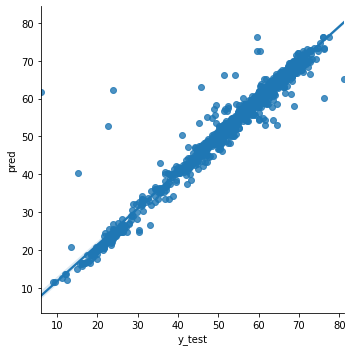




Shape of cluster 1 is (2792, 4)
Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   44.0s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   49.6s finished


Training R Square for cluster 1 is ---- 0.9923543543246616
Validation R Square for cluster 1 is ---- 0.9813527825201399
Validation adjusted R Square for cluster 1 is ---- 0.9812918439009247
Validation MSE for cluster 1 is ---- 9.856064184345954


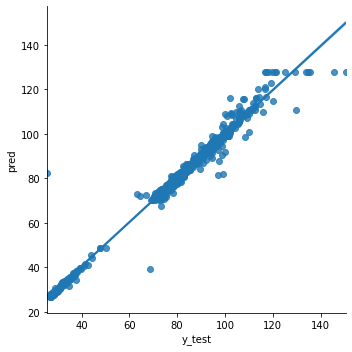

In [681]:
#### Mo0del for clusters
from sklearn.model_selection import RandomizedSearchCV
import pickle

for cl_no in range(len(clustered_X['Cluster'].unique())):
    cluster_X = clustered_X[clustered_X['Cluster'] == cl_no]
    cluster_y = pd.Series([y.tolist()[x] for x in cluster_X.index.tolist()])
    print(f'Shape of cluster {cl_no} is {cluster_X.shape}')
    cluster_X = cluster_X[['Discount_avail_1.0','Maximum_price','Minimum_price']]
    X_train, X_test, y_train, y_test = train_test_split(cluster_X, cluster_y, test_size=0.33, random_state=42)
    
    params = {'n_estimators' : [100,300,500,800,1000,1500],
         'min_samples_leaf' : [3,5,7,9],
         'min_samples_split' : [4,6,8,10,12],
         'max_depth' : [2,4,6,8,10,12,14]
         }
    ran_for_reg = RandomForestRegressor()
    ran_for_reg.fit(X_train,y_train)
    random_cv = RandomizedSearchCV(ran_for_reg,param_distributions = params,n_jobs = -1,cv = 5, verbose = 1)
    random_cv.fit(X_train,y_train)
    best_model = random_cv.best_estimator_
    best_model.fit(X_train,y_train)
    print(f'Training R Square for cluster {cl_no} is ---- {best_model.score(X_train,y_train)}')
    pred = best_model.predict(X_test)
    print(f'Validation R Square for cluster {cl_no} is ---- {r2_score(y_test,pred)}')
    print(f'Validation adjusted R Square for cluster {cl_no} is ---- {adjus_r_sq(X_test,y_test,best_model)}')
    print(f'Validation MSE for cluster {cl_no} is ---- {mean_squared_error(y_test,pred)}')
    sns.lmplot('y_test','pred',data = pd.DataFrame({"y_test" : y_test, "pred" : pred}))
    plt.show()
    print("\n\n")
    pickle_out = open(f"model_cluster{cl_no}.pkl","wb")
    pickle.dump(best_model, pickle_out)
    pickle_out.close()

- Still our problem is there so one thing could happen here is we have seen in our EDA that ther are some bad data where sales price is less than minimum value and some sales price is greater than maximum price.
- Also we have seen that these things happen mostly where discount is available.

In [700]:
bad_data = train_data[(train_data['Selling_Price'] < train_data['Minimum_price']) & (train_data['Selling_Price'] < train_data['Maximum_price'])]
bad_data.shape

(842, 15)

In [701]:
bad_data.head()

Product_id  Stall_no             instock_date  Market_Category  \
4   JWSEBUKYQPMBZ3RK       7.0  2016-03-29 22:58:53.000               63   
9   BRAE3P8Y8UVRY43K       5.0  2015-08-19 22:16:52.000              275   
20  ACCDX9Y3MJET7BHY      24.0  2016-03-27 19:15:57.000              137   
38  TUNEBYH39YV2GFFT      25.0  2016-03-28 22:41:35.000               11   
39  SHIEBZY34GZUFZQX      21.0  2015-08-15 22:15:41.000              443   

   Customer_name Loyalty_customer Product_Category  Grade  Demand  \
4         Dustyn              Yes           Repair      1      35   
9          Nigel              Yes       Child_care      0      84   
20         Freja              Yes          Organic      0       7   
38        Madhav              Yes         Pet_care      3      85   
39         Rivka              Yes       Technology      0      40   

    Discount_avail  charges_1  charges_2 (%)  Minimum_price  Maximum_price  \
4              1.0      211.0            4.0         2430.0         9261.0   
9              1.0      321.0            8.0         1103.0         5430.0   
20             1.0      139.0            7.0         5821.0        19237.0   
38             1.0      166.0            7.0          558.0         1469.0   
39             1.0      613.0           13.0         5658.0         8363.0   

    Selling_Price  
4      906.553935  
9      530.761862  
20    1901.325348  
38     174.482246  
39    1119.131441

In [703]:
bad_data.groupby('Discount_avail').agg(['count','median'])['Selling_Price']

count      median
Discount_avail                   
0.0                 2  347.000000
1.0               834  716.675677

### Let us split the data by discount_avail


In [724]:
# define a function for all preprocessing

def preprocessing(X,y): 
    X['Discount_avail'] = X['Discount_avail'].fillna(X['Discount_avail'].mode()[0])
    charges_2_dict = X.groupby(["Product_Category"]).median()["charges_2 (%)"].to_dict()  
    X['charges_2_missing'] = np.where(X['charges_2 (%)'].isna(),1,0)
    for row in list(X[X['charges_2 (%)'].isna()].index):
        for key in list(charges_2_dict.keys()):
            if  X.loc[row,'Product_Category'] == key:
                X.loc[row,'charges_2 (%)'] = charges_2_dict[key]
        
    minimum_dict = X.groupby('Grade').median()['Minimum_price'].to_dict()
    maximum_dict = X.groupby('Grade').median()['Maximum_price'].to_dict()
    for var,dictionary in zip(['Minimum_price','Maximum_price'],[minimum_dict,maximum_dict]):
        for row in list(X[X[var].isna()].index):
            for row_dict in range(len(list(dictionary.keys()))):
                if (X.loc[row,'Grade'] == list(dictionary.keys())[row_dict]):
                        X.loc[row,var] = list(dictionary.values())[row_dict]

    charges_1_dict = X.groupby(['Product_Category']).median()['charges_1'].to_dict()
    for row in list(X[X['charges_1'].isna()].index):
        for key in list(charges_1_dict.keys()):
            if  X.loc[row,'Product_Category'] == key:
                X.loc[row,'charges_1'] = charges_1_dict[key]

    X.drop(['Product_id','Customer_name'],axis = 1,inplace = True)
    enc = BinaryEncoder(cols=['Stall_no'],return_df=True)
    X = enc.fit_transform(X)
    X = pd.get_dummies(X,columns=['Loyalty_customer','Product_Category'],drop_first= True)
    X['hour'] = X['instock_date'].apply(lambda x: x[10:13])
    X.drop(['instock_date'],axis = 1, inplace = True)
    hour_freq_dict = X['hour'].value_counts().to_dict()
    X['hour'] = X['hour'].map(hour_freq_dict)
    enc_market = BinaryEncoder(cols=['Market_Category'],return_df=True)
    X = enc_market.fit_transform(X)

    ## outlier
    for var in ['Maximum_price','Minimum_price']:
    # for var in ['ref_price','charges_1']:
        Q1 = X[var].quantile(.25)
        Q3 = X[var].quantile(.75)
        IQR = Q3 - Q1
        upper_range = Q3 + (2*IQR)
        lower_range = Q1 - (2*IQR)

        print(f"upper range for {var} is {upper_range}")
        print(f"lower range for {var} is {lower_range}")

        # As these are positively skewed so we can find outliers only in right tails
        X[var] = X[var].apply(lambda x: upper_range if x > upper_range else x)

    ## Feature Transformation
    X['charges_2 (%)'] = X['charges_2 (%)'].astype('int')
    X['Maximum_price'] = np.sqrt(X['Maximum_price'])
    X['Minimum_price'] = np.sqrt(X['Minimum_price'])
    X['charges_1'] = np.log(X['charges_1'])
    X['charges_2 (%)'] = np.log(X['charges_2 (%)'])
    y = np.sqrt(y)

    return X

In [725]:
X = data.iloc[:,:-1]
y = data['Selling_Price']

In [726]:
X = preprocessing(X,y)

upper range for Maximum_price is 15934.75
lower range for Maximum_price is -3921.5
upper range for Minimum_price is 10303.25
lower range for Minimum_price is -3719.25


In [727]:
X.head()

Stall_no_0  Stall_no_1  Stall_no_2  Stall_no_3  Stall_no_4  Stall_no_5  \
0           0           0           0           0           0           0   
1           0           0           0           0           0           1   
2           0           0           0           0           0           1   
3           0           0           0           0           1           0   
4           0           0           0           0           1           0   

   Stall_no_6  Market_Category_0  Market_Category_1  Market_Category_2  ...  \
0           1                  0                  0                  0  ...   
1           0                  0                  0                  0  ...   
2           1                  0                  0                  0  ...   
3           0                  0                  0                  0  ...   
4           1                  0                  0                  0  ...   

   Product_Category_Cosmetics  Product_Category_Educational  \
0                           0                             0   
1                           0                             0   
2                           0                             0   
3                           0                             1   
4                           0                             0   

   Product_Category_Fashion  Product_Category_Home_decor  \
0                         1                            0   
1                         1                            0   
2                         0                            0   
3                         0                            0   
4                         0                            0   

   Product_Category_Hospitality  Product_Category_Organic  \
0                             0                         0   
1                             0                         0   
2                             0                         0   
3                             0                         0   
4                             0                         0   

   Product_Category_Pet_care  Product_Category_Repair  \
0                          0                        0   
1                          0                        0   
2                          0                        0   
3                          0                        0   
4                          0                        1   

   Product_Category_Technology  hour  
0                            0   179  
1                            0   468  
2                            0   377  
3                            0   468  
4                            0   303  

[5 rows x 35 columns]

In [728]:
# ## Scaling
# scaler = StandardScaler()
# X = pd.DataFrame(scaler.fit_transform(X),columns= X.columns)

In [729]:
X.columns

Index(['Stall_no_0', 'Stall_no_1', 'Stall_no_2', 'Stall_no_3', 'Stall_no_4',
       'Stall_no_5', 'Stall_no_6', 'Market_Category_0', 'Market_Category_1',
       'Market_Category_2', 'Market_Category_3', 'Market_Category_4',
       'Market_Category_5', 'Market_Category_6', 'Market_Category_7',
       'Market_Category_8', 'Grade', 'Demand', 'Discount_avail', 'charges_1',
       'charges_2 (%)', 'Minimum_price', 'Maximum_price', 'charges_2_missing',
       'Loyalty_customer_Yes', 'Product_Category_Cosmetics',
       'Product_Category_Educational', 'Product_Category_Fashion',
       'Product_Category_Home_decor', 'Product_Category_Hospitality',
       'Product_Category_Organic', 'Product_Category_Pet_care',
       'Product_Category_Repair', 'Product_Category_Technology', 'hour'],
      dtype='object')

In [730]:
discount_data = X[X['Discount_avail'] == 1]
non_discount_data = X[X['Discount_avail'] == 0]

In [753]:
print(f'discount data shape {discount_data.shape}')
print(f'non discount data shape {non_discount_data.shape}')

discount data shape (880, 34)
non discount data shape (5428, 34)


In [739]:
discount_y = pd.Series([y.tolist()[x] for x in discount_data.index.tolist()])
non_discount_y = pd.Series([y.tolist()[x] for x in non_discount_data.index.tolist()])

In [ ]:
df = pd.concat([discount_data,discount_y],axis = 1)
sns.pairplot(df[['Grade', 'Demand', 'Discount_avail', 'charges_1','charges_2 (%)', 'Minimum_price', 'Maximum_price','Selling_Price']])

In [ ]:
sns.pairplot(pd.concat([non_discount_data,non_discount_y],axis = 1))

In [731]:
discount_data.drop(['Discount_avail'],axis = 1, inplace = True)
non_discount_data.drop(['Discount_avail'],axis = 1, inplace = True)

In [732]:
# ## Scaling
scaler = StandardScaler()
discount_data = pd.DataFrame(scaler.fit_transform(discount_data),columns= discount_data.columns)
non_discount_data = pd.DataFrame(scaler.fit_transform(non_discount_data),columns= non_discount_data.columns)

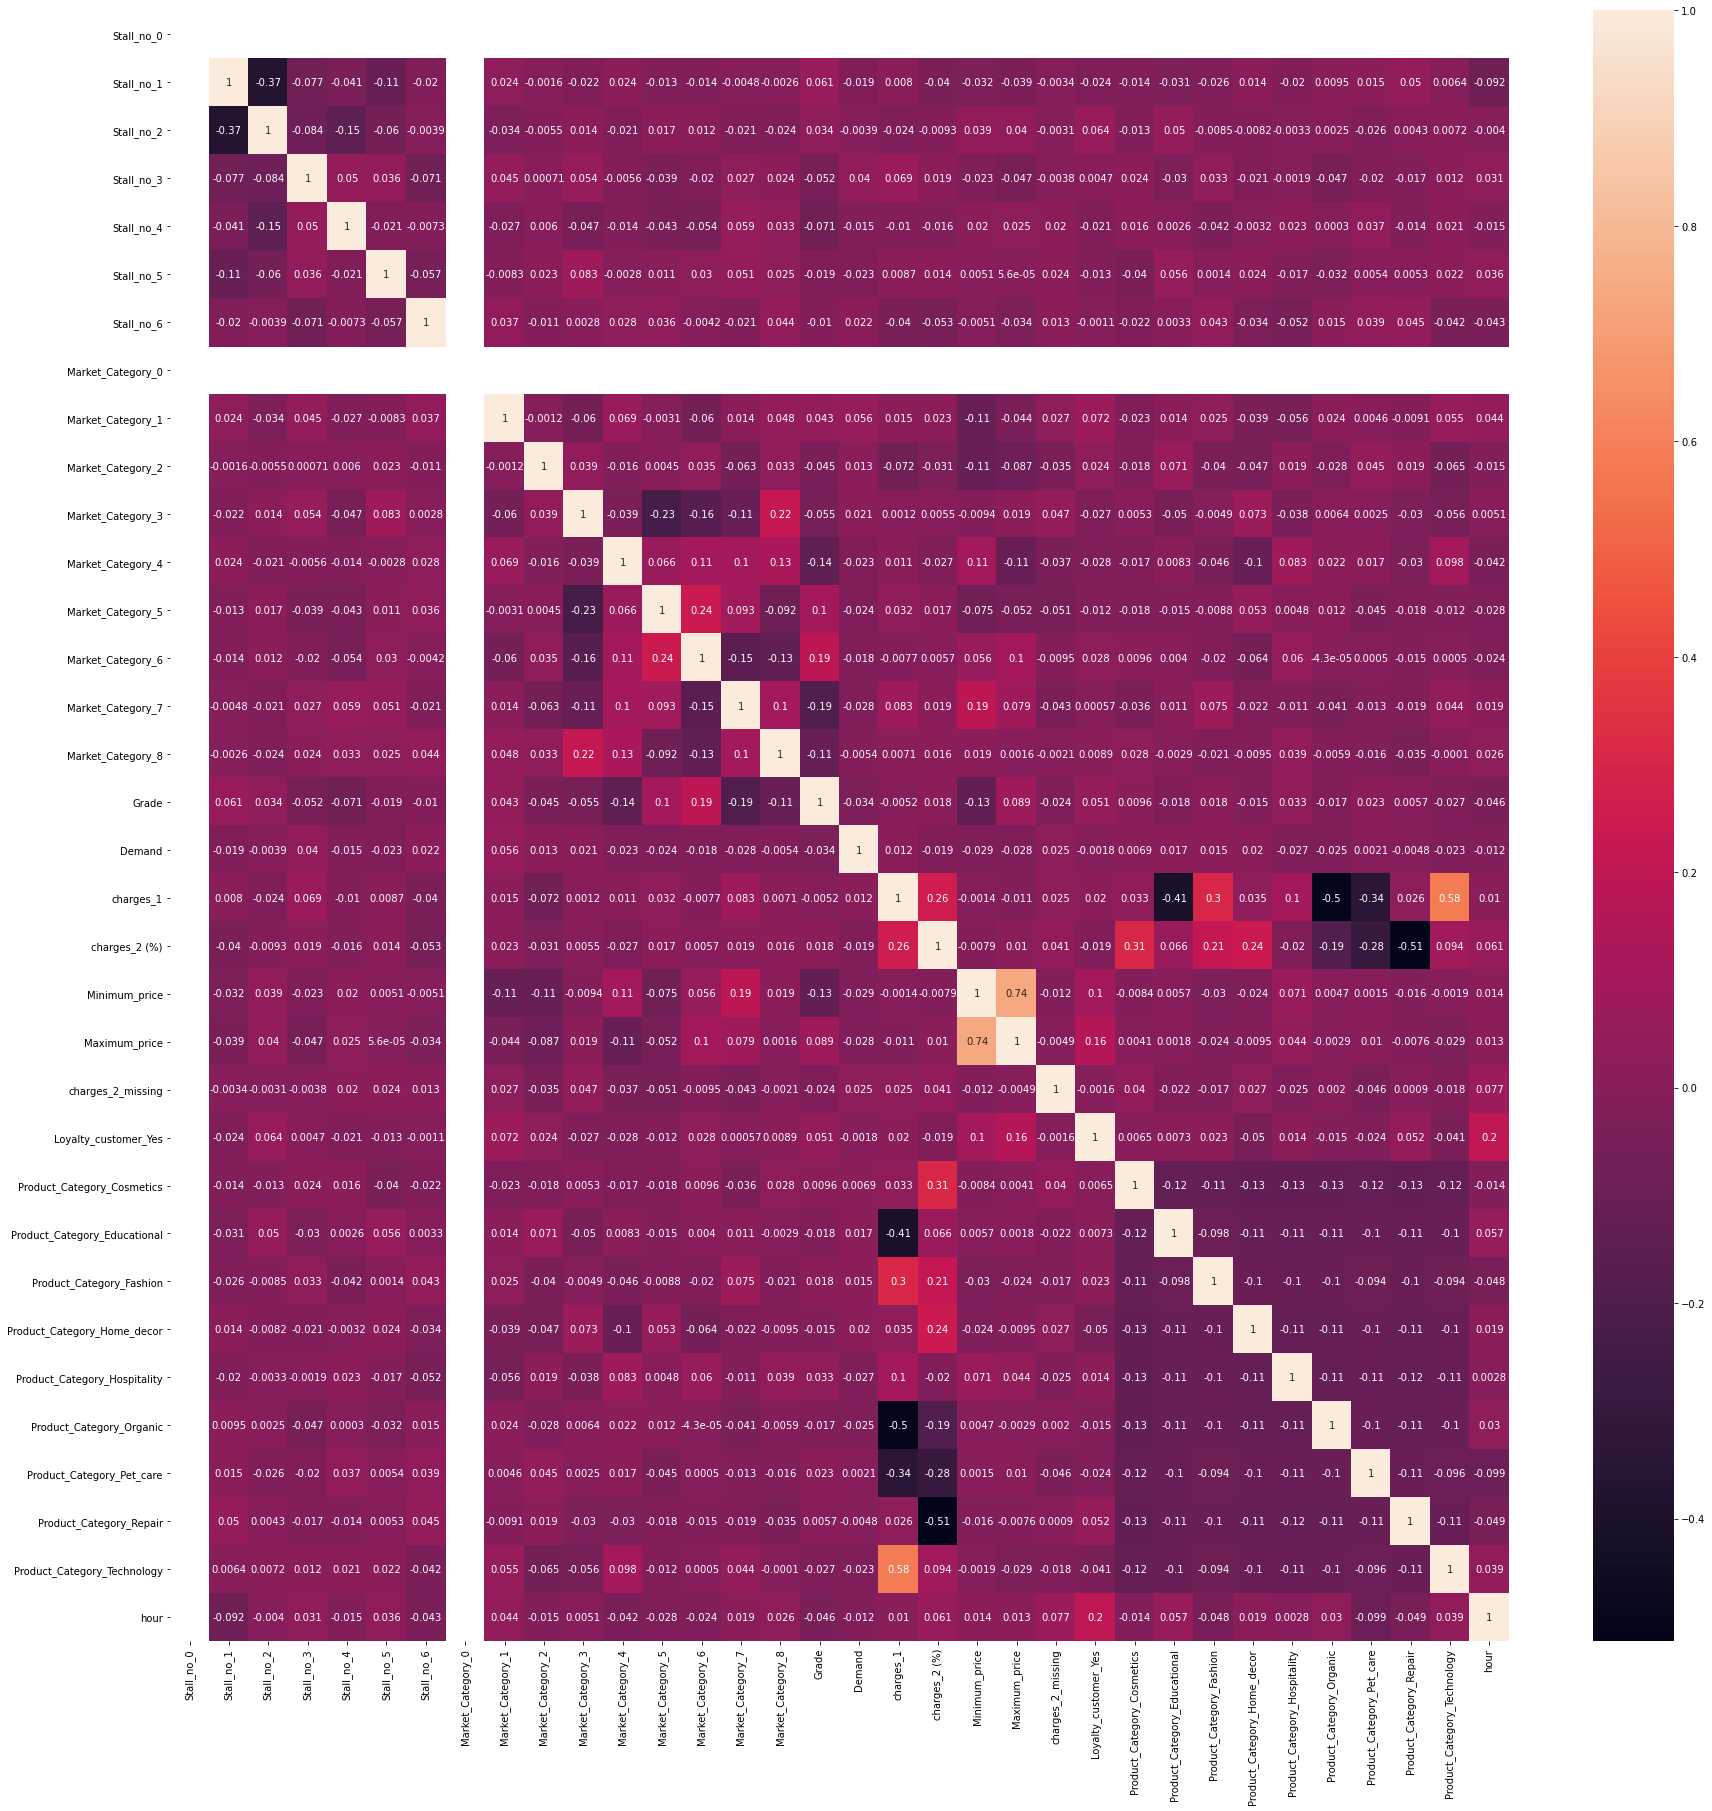

In [733]:
fig = plt.figure(figsize = (30,30))
cor = discount_data.corr()
sns.heatmap(cor,annot= True)

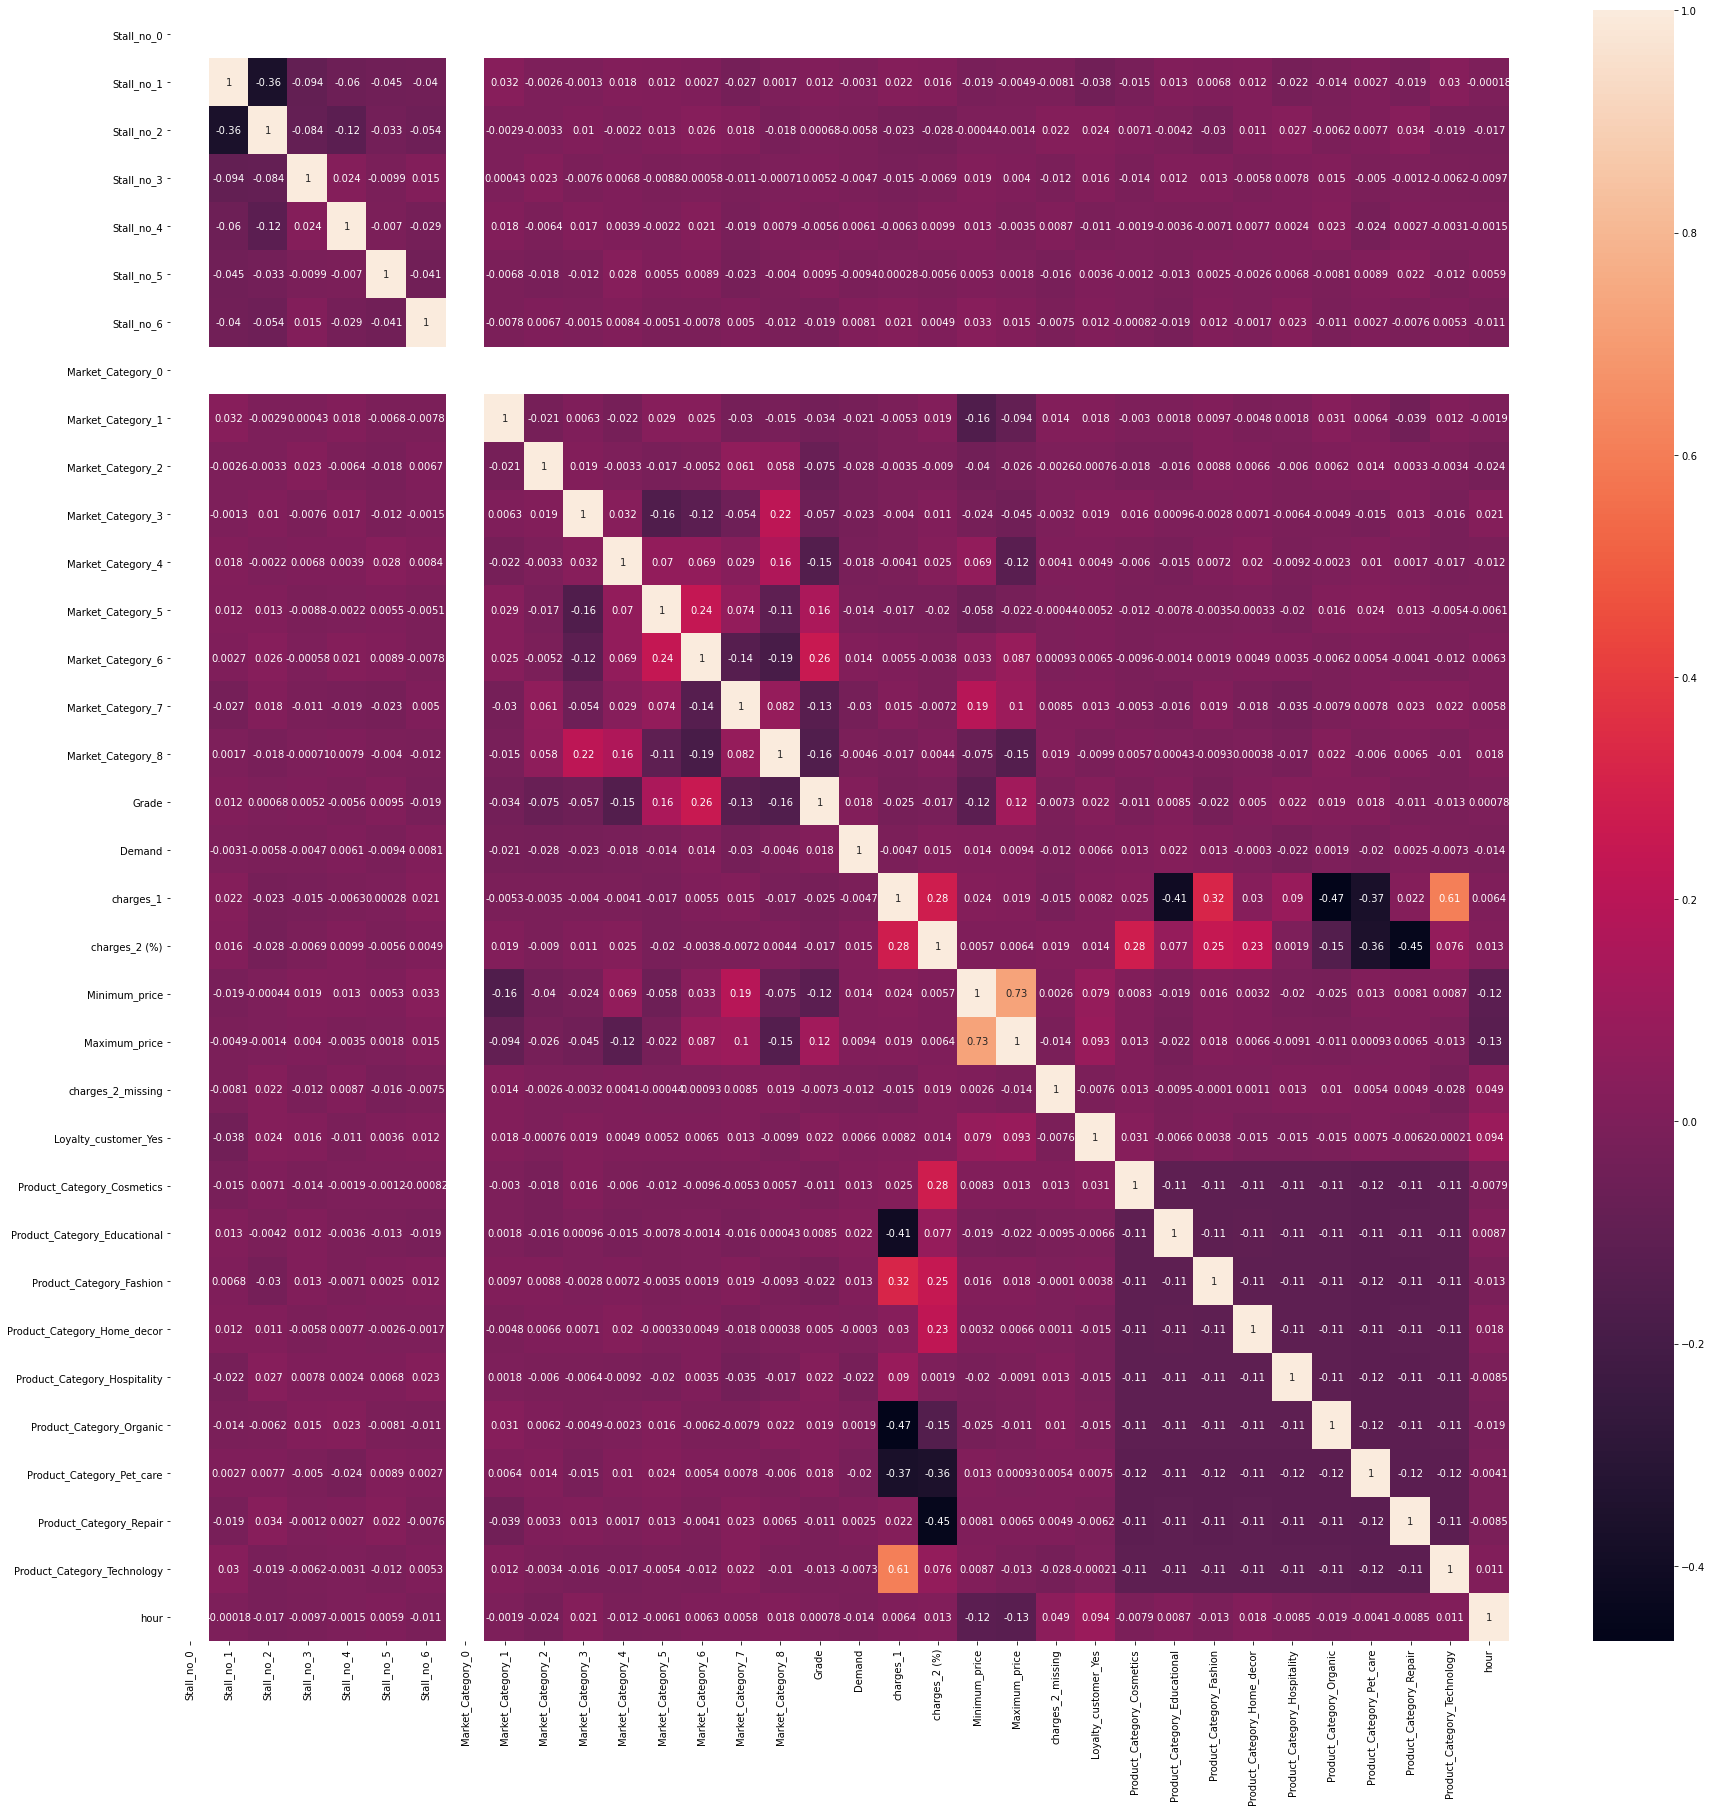

In [734]:
fig = plt.figure(figsize = (30,30))
cor = non_discount_data.corr()
sns.heatmap(cor,annot= True)

In [740]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(discount_data, discount_y, test_size=0.33, random_state=42)
X_train2, X_test2, y_train2, y_test2 = train_test_split(non_discount_data, non_discount_y, test_size=0.33, random_state=42)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   28.9s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   34.6s finished


Training R Square for discount data is ---- 0.07505283255031259
Validation R Square for discount data is ---- -0.010644330317270745
Validation adjusted R Square for discount data is ---- -0.14487053043753328
Validation MSE for discount data is ---- 9013232.366237093


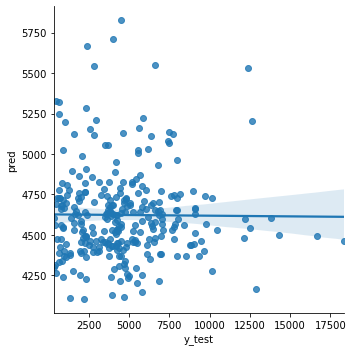

In [751]:
params = {'n_estimators' : [100,300,500,800,1000,1500],
         'min_samples_leaf' : [3,5,7,9],
         'min_samples_split' : [4,6,8,10,12],
         'max_depth' : [2,4,6,8,10,12,14]
         }
ran_for_reg = RandomForestRegressor()
ran_for_reg.fit(X_train1,y_train1)
random_cv = RandomizedSearchCV(ran_for_reg,param_distributions = params,n_jobs = -1,cv = 5, verbose = 1)
random_cv.fit(X_train1,y_train1)
best_model = random_cv.best_estimator_
best_model.fit(X_train1,y_train1)
print(f'Training R Square for discount data is ---- {best_model.score(X_train1,y_train1)}')
pred = best_model.predict(X_test1)
print(f'Validation R Square for discount data is ---- {r2_score(y_test1,pred)}')
print(f'Validation adjusted R Square for discount data is ---- {adjus_r_sq(X_test1,y_test1,best_model)}')
print(f'Validation MSE for discount data is ---- {mean_squared_error(y_test1,pred)}')
sns.lmplot('y_test','pred',data = pd.DataFrame({"y_test" : y_test1, "pred" : pred}))
plt.show()

In [752]:
params = {'n_estimators' : [100,300,500,800,1000,1500],
         'min_samples_leaf' : [3,5,7,9],
         'min_samples_split' : [4,6,8,10,12],
         'max_depth' : [2,4,6,8,10,12,14]
         }
ran_for_reg1 = RandomForestRegressor()
ran_for_reg1.fit(X_train2,y_train2)
random_cv1 = RandomizedSearchCV(ran_for_reg1,param_distributions = params,n_jobs = -1,cv = 5, verbose = 1)
random_cv1.fit(X_train2,y_train2)
best_model1 = random_cv1.best_estimator_
best_model1.fit(X_train2,y_train2)
print(f'Training R Square for discount data is ---- {best_model1.score(X_train2,y_train2)}')
pred1 = best_model1.predict(X_test2)
print(f'Validation R Square for discount data is ---- {r2_score(y_test2,pred1)}')
print(f'Validation adjusted R Square for discount data is ---- {adjus_r_sq(X_test2,y_test2,best_model1)}')
print(f'Validation MSE for discount data is ---- {mean_squared_error(y_test2,pred1)}')
sns.lmplot('y_test','pred',data = pd.DataFrame({"y_test" : y_test2, "pred" : pred1}))
plt.show()

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  2.6min finished


Training R Square for discount data is ---- 0.00954857775718998


ValueError: Found input variables with inconsistent numbers of samples: [1792, 291]

## Test Data

In [683]:
test_data.head()

Product_id  Stall_no             instock_date  Market_Category  \
0  SCHE4YSTDVPVZVXW      39.0  2016-01-13 07:45:08.000              205   
1  ACCEGCATKHNRXUHW      49.0  2015-08-23 20:37:05.000                3   
2  NKCE6GJ5XVJDXNNZ       1.0  2015-11-14 18:12:39.000              183   
3  NKCEB8BK3ZXDHDHM       8.0  2015-11-21 04:56:19.000              358   
4  TOPEFDXSAHRNPF94      33.0  2015-05-06 15:09:46.000              167   

  Customer_name Loyalty_customer Product_Category  Grade  Demand  \
0        Ivanka              No           Fashion      0      90   
1         Isaak              Yes          Fashion      0      87   
2      Analiese              No        Technology      2      55   
3         Rusty              Yes       Child_care      3      86   
4        Eloise              No        Technology      0      27   

   Discount_avail  charges_1  charges_2 (%)  Minimum_price  Maximum_price  
0               0      380.0           16.0         2576.0           3340  
1               0      393.0           16.0         1202.0           1955  
2               0      493.0            9.0         7175.0          15715  
3               0      303.0           16.0         5404.0          13078  
4               0      567.0           16.0         4069.0           6244